# Gender Wage Gap Exploratory Data Analysis 
# Pre Processing Lab Project


In [1]:
import pandas as pd
import numpy as np
# Load the csv files into separate dataframes
extra_df = pd.read_csv('extra.csv')
education_df = pd.read_csv('education.csv')
employment_df = pd.read_csv('employment.csv')
population_df = pd.read_csv('population.csv')


wage = pd.read_csv('wage.csv')

In [2]:
def calculate_nulls(df):
    # Calculate total number of cells in dataframe
    total_cells = np.product(df.shape)

    # Count number of missing values per column
    missing_counts = df.isnull().sum()

    # Calculate total number of missing values
    total_missing = missing_counts.sum()

    # Calculate percentage of missing values
    print("=== Percentage of Missing Values ===")
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print(col,pct_missing)

    value = u1 - u2 / u1

In [3]:
wage
#rename location to Country Code, and TIME to Time
wage = wage.rename(columns={'LOCATION':'Country Code', 'TIME':'Time'})

In [4]:
#wage column types
wage.dtypes
#change Time to object
wage['Time'] = wage['Time'].astype('object')

In [5]:
wage

Country Code INDICATOR   SUBJECT MEASURE FREQUENCY  Time      Value  \
0             AUS   WAGEGAP  EMPLOYEE      PC         A  1975  21.582734   
1             AUS   WAGEGAP  EMPLOYEE      PC         A  1976  20.754717   
2             AUS   WAGEGAP  EMPLOYEE      PC         A  1977  18.390805   
3             AUS   WAGEGAP  EMPLOYEE      PC         A  1978  19.791667   
4             AUS   WAGEGAP  EMPLOYEE      PC         A  1979  20.000000   
...           ...       ...       ...     ...       ...   ...        ...   
1304          BRA   WAGEGAP  EMPLOYEE      PC         A  2017  13.333333   
1305          BRA   WAGEGAP  EMPLOYEE      PC         A  2018  10.666667   
1306          BRA   WAGEGAP  EMPLOYEE      PC         A  2019   6.666667   
1307          BRA   WAGEGAP  EMPLOYEE      PC         A  2020   6.250000   
1308          BRA   WAGEGAP  EMPLOYEE      PC         A  2021   9.090909   

     Flag Codes  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
1304        NaN  
1305        NaN  
1306        NaN  
1307        NaN  
1308        NaN  

[1309 rows x 8 columns]

## Merging without  wage

In [6]:

# Merge the dataframes into one using an outer join
merged_df = extra_df.merge(education_df, how='outer', on=['Time', 'Time Code', 'Country Name', 'Country Code'])
merged_df = merged_df.merge(employment_df, how='outer', on=['Time', 'Time Code', 'Country Name', 'Country Code'])
merged_df = merged_df.merge(population_df, how='outer', on=['Time', 'Time Code', 'Country Name', 'Country Code'])

#replace ".." with NaN
merged_df = merged_df.replace("..", np.nan)

In [7]:
merged_df
#add 'OG' to the end of all column names
names = merged_df.columns[5:].astype(str) + '_OG'

#rename coluns [5:] to names
merged_df.columns.values[5:] = names

In [8]:
merged_df

Time Time Code Country Name  \
0                                      1973    YR1973    Australia   
1                                      1973    YR1973      Austria   
2                                      1973    YR1973      Belgium   
3                                      1973    YR1973       Canada   
4                                      1973    YR1973        Chile   
...                                     ...       ...          ...   
1978                                    NaN       NaN          NaN   
1979                                    NaN       NaN          NaN   
1980                                    NaN       NaN          NaN   
1981  Data from database: Gender Statistics       NaN          NaN   
1982               Last Updated: 03/06/2023       NaN          NaN   

     Country Code  \
0             AUS   
1             AUT   
2             BEL   
3             CAN   
4             CHL   
...           ...   
1978          NaN   
1979          NaN   
1980          NaN   
1981          NaN   
1982          NaN   

      A woman can travel outside her home in the same way as a man (1=yes; 0=no) [SG.HME.TRVL.EQ]  \
0                                                   0.0                                             
1                                                   1.0                                             
2                                                   1.0                                             
3                                                   1.0                                             
4                                                   1.0                                             
...                                                 ...                                             
1978                                                NaN                                             
1979                                                NaN                                             
1980                                                NaN                                             
1981                                                NaN                                             
1982                                                NaN                                             

      A woman can travel outside the country in the same way as a man (1=yes; 0=no) [SG.CTR.TRVL.EQ]_OG  \
0                                                   1.0                                                   
1                                                   1.0                                                   
2                                                   1.0                                                   
3                                                   1.0                                                   
4                                                   1.0                                                   
...                                                 ...                                                   
1978                                                NaN                                                   
1979                                                NaN                                                   
1980                                                NaN                                                   
1981                                                NaN                                                   
1982                                                NaN                                                   

     Women participating in own health care decisions (% of women age 15-49) [SG.DMK.HLTH.FN.ZS]_OG  \
0                                                   NaN                                               
1                                                   NaN                                               
2                                                   NaN                                               
3                                  

In [9]:
#import plt and sns
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#remove last 2 rows
merged_df = merged_df[:-2]
merged_df = merged_df.dropna(subset=['Time'])
merged_df['Time'] = merged_df['Time'].astype('int64')

In [11]:

merged_df = merged_df[merged_df['Time'] >= 2000]
#only keep years 2000 - 2021


## WorldBank Data Import and Prepare to merge

### Education Import

In [12]:
#import new dataset more.csv
more_df = pd.read_csv('more2.csv', encoding='ISO-8859-1')
# Load more.csv into a pandas dataframe
# Clean up the year columns' names

# Melt more_df to long format
more_df_melt = more_df.melt(id_vars=['Country Name', 'Country Code', 'Series', 'Series Code'],
                            var_name='Year',
                            value_name='Value')
#replace .. with NaN
more_df_melt = more_df_melt.replace("..", np.nan)

#remove whats between [] in year column
more_df_melt['Year'] = more_df_melt['Year'].str.replace(r"\[.*\]", "")

more_df_melt['Year'] = more_df_melt['Year'].astype('int64')

#make unique series code to be columns
more_df_melt = more_df_melt.pivot_table(index=['Country Name', 'Country Code', 'Year'], columns='Series', values='Value')
#rename Year to Time
more_df_melt.reset_index(inplace=True)
more_df_melt = more_df_melt.rename(columns={'Year':'Time'})
# Define the threshold for dropping columns
thresh = len(more_df_melt) * 0.5

# Drop columns with null value ratio above 50%
more_df_melt = more_df_melt.dropna(thresh=thresh, axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_8940\2515024314.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  more_df_melt['Year'] = more_df_melt['Year'].str.replace(r"\[.*\]", "")


In [13]:
more_df_melt['Time'] = more_df_melt['Time'].astype('int64')


    Merge

In [14]:
merged_df = merged_df.merge(more_df_melt, how='outer', on=['Time', 'Country Name', 'Country Code'])
merged_df = merged_df.dropna(subset=['Time'])


### Health Import

In [15]:
#import new dataset more.csv
more_df = pd.read_csv('more3.csv', encoding='ISO-8859-1')
# Load more.csv into a pandas dataframe
# Clean up the year columns' names

# Melt more_df to long format
more_df_melt = more_df.melt(id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
                            var_name='Year',
                            value_name='Value')
#replace .. with NaN
more_df_melt = more_df_melt.replace("..", np.nan)

#remove whats between [] in year column
more_df_melt['Year'] = more_df_melt['Year'].str.replace(r"\[.*\]", "")


# make unique series code to be columns
more_df_melt = more_df_melt.pivot_table(index=['Country Code', 'Year'], columns='Series Name', values='Value')

more_df_melt.reset_index(inplace=True)
more_df_melt = more_df_melt.rename(columns={'Year':'Time'})

C:\Users\HP\AppData\Local\Temp\ipykernel_8940\601155751.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  more_df_melt['Year'] = more_df_melt['Year'].str.replace(r"\[.*\]", "")


### Enviroment Import

In [16]:
#import new dataset more.csv
more_df = pd.read_csv('more4.csv', encoding='ISO-8859-1')
# Load more.csv into a pandas dataframe
# Clean up the year columns' names

# Melt more_df to long format
more_df_melt = more_df.melt(id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
                            var_name='Year',
                            value_name='Value')
#replace .. with NaN
more_df_melt = more_df_melt.replace("..", np.nan)

#remove whats between [] in year column
more_df_melt['Year'] = more_df_melt['Year'].str.replace(r"\[.*\]", "")


#make unique series code to be columns
more_df_melt = more_df_melt.pivot_table(index=['Country Name', 'Country Code', 'Year'], columns='Series Name', values='Value')
#rename Year to Time
more_df_melt.reset_index(inplace=True)
more_df_melt = more_df_melt.rename(columns={'Year':'Time'})
# Define the threshold for dropping columns
thresh = len(more_df_melt) * 0.5

# Drop columns with null value ratio above 50%
more_df_melt = more_df_melt.dropna(thresh=thresh, axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_8940\2470421869.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  more_df_melt['Year'] = more_df_melt['Year'].str.replace(r"\[.*\]", "")


In [17]:
more_df_melt['Time'] = more_df_melt['Time'].astype('int64')


In [18]:
merged_df = merged_df[merged_df['Time'] >= 2000]
# merged_df = merged_df.merge(more_df, how='right', on=['Time', 'Country Code'])
# #only keep years 2000 - 2021


In [19]:
merged_df = merged_df.merge(more_df_melt, how='outer', on=['Time', 'Country Name', 'Country Code'])
merged_df = merged_df.dropna(subset=['Time'])

#drop countries not in  countries


In [20]:
# merged_df = merged_df[merged_df['Country Name'].isin(countries)]

In [21]:
merged_df

Time Time Code Country Name Country Code  \
0    2000    YR2000    Australia          AUS   
1    2000    YR2000      Austria          AUT   
2    2000    YR2000      Belgium          BEL   
3    2000    YR2000       Canada          CAN   
4    2000    YR2000        Chile          CHL   
..    ...       ...          ...          ...   
959  2021       NaN       Belize          BLZ   
960  2022       NaN       Belize          BLZ   
961  2020       NaN   Seychelles          SYC   
962  2021       NaN   Seychelles          SYC   
963  2022       NaN   Seychelles          SYC   

     A woman can travel outside her home in the same way as a man (1=yes; 0=no) [SG.HME.TRVL.EQ]  \
0                                                  1.0                                             
1                                                  1.0                                             
2                                                  1.0                                             
3                                                  1.0                                             
4                                                  1.0                                             
..                                                 ...                                             
959                                                NaN                                             
960                                                NaN                                             
961                                                NaN                                             
962                                                NaN                                             
963                                                NaN                                             

     A woman can travel outside the country in the same way as a man (1=yes; 0=no) [SG.CTR.TRVL.EQ]_OG  \
0                                                  1.0                                                   
1                                                  1.0                                                   
2                                                  1.0                                                   
3                                                  1.0                                                   
4                                                  1.0                                                   
..                                                 ...                                                   
959                                                NaN                                                   
960                                                NaN                                                   
961                                                NaN                                                   
962                                                NaN                                                   
963                                                NaN                                                   

    Women participating in own health care decisions (% of women age 15-49) [SG.DMK.HLTH.FN.ZS]_OG  \
0                                                  NaN                                               
1                                                  NaN                                               
2                                                  NaN                                               
3                                                  NaN                                               
4                                                  NaN                                               
..                                                 ...                                               
959                                                NaN                                               
960                                                NaN                                               
961                     

## dropping columns with 50%> missing values

In [22]:
# Define the threshold for dropping columns
thresh = len(merged_df) * 0.5

# Drop columns with null value ratio above 50%
merged_df = merged_df.dropna(thresh=thresh, axis=1)


In [23]:
merged_df_2 = merged_df.copy()

In [24]:
merged_df_2

Time Time Code Country Name Country Code  \
0    2000    YR2000    Australia          AUS   
1    2000    YR2000      Austria          AUT   
2    2000    YR2000      Belgium          BEL   
3    2000    YR2000       Canada          CAN   
4    2000    YR2000        Chile          CHL   
..    ...       ...          ...          ...   
959  2021       NaN       Belize          BLZ   
960  2022       NaN       Belize          BLZ   
961  2020       NaN   Seychelles          SYC   
962  2021       NaN   Seychelles          SYC   
963  2022       NaN   Seychelles          SYC   

     A woman can travel outside her home in the same way as a man (1=yes; 0=no) [SG.HME.TRVL.EQ]  \
0                                                  1.0                                             
1                                                  1.0                                             
2                                                  1.0                                             
3                                                  1.0                                             
4                                                  1.0                                             
..                                                 ...                                             
959                                                NaN                                             
960                                                NaN                                             
961                                                NaN                                             
962                                                NaN                                             
963                                                NaN                                             

     A woman can travel outside the country in the same way as a man (1=yes; 0=no) [SG.CTR.TRVL.EQ]_OG  \
0                                                  1.0                                                   
1                                                  1.0                                                   
2                                                  1.0                                                   
3                                                  1.0                                                   
4                                                  1.0                                                   
..                                                 ...                                                   
959                                                NaN                                                   
960                                                NaN                                                   
961                                                NaN                                                   
962                                                NaN                                                   
963                                                NaN                                                   

    Female share of employment in senior and middle management (%) [SL.EMP.SMGT.FE.ZS]_OG  \
0                                                  NaN                                      
1                                     28.1000003814697                                      
2                                                 24.5                                      
3                                                  NaN                                      
4                                                 35.5                                      
..                                                 ...                                      
959                                                NaN                                      
960                                                NaN                                      
961                                                NaN                                      
962         

In [25]:
# #list that has columns with nulls
# cols_with_nulls = merged_df_2.columns[merged_df_2.isnull().any()].tolist()

# # Group by Country and Year, then count the number of entries per group
# observations_per_country_year = merged_df_2.groupby(['Country Code', 'Time']).size().reset_index(name='Count')

# # Pivot this data so that each country is a column, each row is a year, and the values are the counts
# pivot_table = observations_per_country_year.pivot('Time', 'Country Code', 'Count')
# #replace Country Code in pivot with label encoded values
# # Display this as a heatmap
# plt.figure(figsize=(10,8))
# sns.heatmap(pivot_table, cmap='viridis')
# plt.title('Number of Observations per Country per Year')
# plt.xlabel('Country Code')
# plt.ylabel('Year')
# plt.legend()
# plt.show()



## Merging with Wage

In [26]:
wage

Country Code INDICATOR   SUBJECT MEASURE FREQUENCY  Time      Value  \
0             AUS   WAGEGAP  EMPLOYEE      PC         A  1975  21.582734   
1             AUS   WAGEGAP  EMPLOYEE      PC         A  1976  20.754717   
2             AUS   WAGEGAP  EMPLOYEE      PC         A  1977  18.390805   
3             AUS   WAGEGAP  EMPLOYEE      PC         A  1978  19.791667   
4             AUS   WAGEGAP  EMPLOYEE      PC         A  1979  20.000000   
...           ...       ...       ...     ...       ...   ...        ...   
1304          BRA   WAGEGAP  EMPLOYEE      PC         A  2017  13.333333   
1305          BRA   WAGEGAP  EMPLOYEE      PC         A  2018  10.666667   
1306          BRA   WAGEGAP  EMPLOYEE      PC         A  2019   6.666667   
1307          BRA   WAGEGAP  EMPLOYEE      PC         A  2020   6.250000   
1308          BRA   WAGEGAP  EMPLOYEE      PC         A  2021   9.090909   

     Flag Codes  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
1304        NaN  
1305        NaN  
1306        NaN  
1307        NaN  
1308        NaN  

[1309 rows x 8 columns]

In [27]:
#get unique values of wage country code and encode them manually

In [28]:
#change Time and Value to int
wage['Time'] = wage['Time'].astype('int')
wage['Value'] = wage['Value'].astype('int')

#change Country Code to string
wage['Country Code'] = wage['Country Code'].astype('str')

In [29]:
wage.dtypes

Country Code    object
INDICATOR       object
SUBJECT         object
MEASURE         object
FREQUENCY       object
Time             int32
Value            int32
Flag Codes      object
dtype: object

In [30]:

#change Time and Value to int
merged_df_2['Time'] = merged_df_2['Time'].astype('int')

#change Country Code to string
merged_df_2['Country Code'] = merged_df_2['Country Code'].astype('str')

In [31]:
#merge wiith wage
merged_df_2 = merged_df_2.merge(wage, how='inner', on=['Time', 'Country Code'])

In [32]:
merged_df_2

Time Time Code    Country Name Country Code  \
0     2000    YR2000       Australia          AUS   
1     2000    YR2000         Austria          AUT   
2     2000    YR2000         Belgium          BEL   
3     2000    YR2000          Canada          CAN   
4     2000    YR2000           Chile          CHL   
...    ...       ...             ...          ...   
1057  2021    YR2021          Sweden          SWE   
1058  2021    YR2021  United Kingdom          GBR   
1059  2021    YR2021   United States          USA   
1060  2022    YR2022       Australia          AUS   
1061  2022    YR2022     New Zealand          NZL   

      A woman can travel outside her home in the same way as a man (1=yes; 0=no) [SG.HME.TRVL.EQ]  \
0                                                   1.0                                             
1                                                   1.0                                             
2                                                   1.0                                             
3                                                   1.0                                             
4                                                   1.0                                             
...                                                 ...                                             
1057                                                1.0                                             
1058                                                1.0                                             
1059                                                1.0                                             
1060                                                1.0                                             
1061                                                1.0                                             

      A woman can travel outside the country in the same way as a man (1=yes; 0=no) [SG.CTR.TRVL.EQ]_OG  \
0                                                   1.0                                                   
1                                                   1.0                                                   
2                                                   1.0                                                   
3                                                   1.0                                                   
4                                                   1.0                                                   
...                                                 ...                                                   
1057                                                1.0                                                   
1058                                                1.0                                                   
1059                                                1.0                                                   
1060                                                1.0                                                   
1061                                                1.0                                                   

     Female share of employment in senior and middle management (%) [SL.EMP.SMGT.FE.ZS]_OG  \
0                                                   NaN                                      
1                                      28.1000003814697                                      
2                                                  24.5                                      
3                                                   NaN                                      
4                                                  35.5                                      
...                                                 ...                                      
1057                                                NaN                                      
1058                                                NaN                                      
1059                     

In [33]:
#null percentage of column Value
merged_df_2['Value'].isnull().sum()/len(merged_df_2['Value'])

0.0

In [34]:
merged_df_2

Time Time Code    Country Name Country Code  \
0     2000    YR2000       Australia          AUS   
1     2000    YR2000         Austria          AUT   
2     2000    YR2000         Belgium          BEL   
3     2000    YR2000          Canada          CAN   
4     2000    YR2000           Chile          CHL   
...    ...       ...             ...          ...   
1057  2021    YR2021          Sweden          SWE   
1058  2021    YR2021  United Kingdom          GBR   
1059  2021    YR2021   United States          USA   
1060  2022    YR2022       Australia          AUS   
1061  2022    YR2022     New Zealand          NZL   

      A woman can travel outside her home in the same way as a man (1=yes; 0=no) [SG.HME.TRVL.EQ]  \
0                                                   1.0                                             
1                                                   1.0                                             
2                                                   1.0                                             
3                                                   1.0                                             
4                                                   1.0                                             
...                                                 ...                                             
1057                                                1.0                                             
1058                                                1.0                                             
1059                                                1.0                                             
1060                                                1.0                                             
1061                                                1.0                                             

      A woman can travel outside the country in the same way as a man (1=yes; 0=no) [SG.CTR.TRVL.EQ]_OG  \
0                                                   1.0                                                   
1                                                   1.0                                                   
2                                                   1.0                                                   
3                                                   1.0                                                   
4                                                   1.0                                                   
...                                                 ...                                                   
1057                                                1.0                                                   
1058                                                1.0                                                   
1059                                                1.0                                                   
1060                                                1.0                                                   
1061                                                1.0                                                   

     Female share of employment in senior and middle management (%) [SL.EMP.SMGT.FE.ZS]_OG  \
0                                                   NaN                                      
1                                      28.1000003814697                                      
2                                                  24.5                                      
3                                                   NaN                                      
4                                                  35.5                                      
...                                                 ...                                      
1057                                                NaN                                      
1058                                                NaN                                      
1059                     

In [35]:
#how many unique countries and years
merged_df_2['Country Code'].nunique()

38

In [36]:
for col in merged_df_2.columns[5:]:
    merged_df_2[col] = pd.to_numeric(merged_df_2[col], errors='ignore')  # 'ignore' leaves non-numeric as is
#drop Flag Codes INDICATOR	SUBJECT	MEASURE	FREQUENCY
merged_df_2 = merged_df_2.drop(['Flag Codes', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY'], axis=1)

#drop Time Code and Country Name
merged_df_2 = merged_df_2.drop(['Time Code', 'Country Name'], axis=1)

# check missing observations per country & year

In [37]:
#for each year show how many unique countries have data
merged_df_2.groupby('Time').nunique()

Country Code  \
Time                 
2000            16   
2001            17   
2002            33   
2003            24   
2004            28   
2005            29   
2006            36   
2007            35   
2008            35   
2009            36   
2010            37   
2011            37   
2012            36   
2013            37   
2014            37   
2015            37   
2016            36   
2017            37   
2018            37   
2019            34   
2020            34   
2021            21   
2022             2   

      A woman can travel outside her home in the same way as a man (1=yes; 0=no) [SG.HME.TRVL.EQ]  \
Time                                                                                                
2000                                                  1                                             
2001                                                  1                                             
2002                                                  1                                             
2003                                                  1                                             
2004                                                  1                                             
2005                                                  1                                             
2006                                                  1                                             
2007                                                  1                                             
2008                                                  1                                             
2009                                                  1                                             
2010                                                  1                                             
2011                                                  1                                             
2012                                                  1                                             
2013                                                  1                                             
2014                                                  1                                             
2015                                                  1                                             
2016                                                  1                                             
2017                                                  1                                             
2018                                                  1                                             
2019                                                  1                                             
2020                                                  1                                             
2021                                                  1                                             
2022                                                  1                                             

      A woman can travel outside the country in the same way as a man (1=yes; 0=no) [SG.CTR.TRVL.EQ]_OG  \
Time                                                                                                      
2000                                                  1                                                   
2001                                                  1                                                   
2002                                                  1                                                   
2003                                                  1                                                   
2004                                                  1                                                   
2005                                                  1                                                   
2006                                                  1                  

In [38]:
#for each year, display unique countries that has data
merged_df_2.groupby('Time')['Country Code'].unique()

Time
2000    [AUS, AUT, BEL, CAN, CHL, FIN, DEU, HUN, JPN, ...
2001    [AUS, AUT, BEL, CAN, CZE, FIN, DEU, HUN, ISR, ...
2002    [AUS, AUT, BEL, CAN, CZE, DNK, EST, FIN, FRA, ...
2003    [AUS, AUT, BEL, CAN, CHL, CZE, DNK, EST, FIN, ...
2004    [AUS, AUT, BEL, CAN, CZE, DNK, EST, FIN, FRA, ...
2005    [AUS, AUT, BEL, CAN, CZE, DNK, EST, FIN, FRA, ...
2006    [AUS, AUT, BEL, CAN, CHL, CZE, DNK, EST, FIN, ...
2007    [AUS, AUT, BEL, CAN, COL, CZE, DNK, EST, FIN, ...
2008    [AUS, AUT, BEL, CAN, COL, CZE, DNK, EST, FIN, ...
2009    [AUS, AUT, BEL, CAN, CHL, COL, CZE, DNK, EST, ...
2010    [AUS, AUT, BEL, CAN, COL, CRI, CZE, DNK, EST, ...
2011    [AUS, AUT, BEL, CAN, CHL, COL, CRI, CZE, DNK, ...
2012    [AUS, AUT, BEL, CAN, COL, CRI, CZE, DNK, EST, ...
2013    [AUS, AUT, BEL, CAN, CHL, COL, CRI, CZE, DNK, ...
2014    [AUS, AUT, BEL, CAN, COL, CRI, CZE, DNK, EST, ...
2015    [AUS, AUT, BEL, CAN, CHL, COL, CRI, CZE, DNK, ...
2016    [AUS, AUT, BEL, CAN, COL, CRI, CZE, DNK, EST, ...
2017    [

In [39]:
def find_common_countries(df):
    # Get the unique years
    unique_years = df['Time'].unique()

    # Initialize the set of common countries with the countries from the first year
    common_countries = set(df[df['Time'] == unique_years[0]]['Country Code'].unique())

    # Iterate through the rest of the years
    for year in unique_years[1:]:
        # Get the set of countries for the current year
        current_year_countries = set(df[df['Time'] == year]['Country Code'].unique())
        # Update the set of common countries to be the intersection of the current set of common countries and the countries of the current year
        common_countries = common_countries.intersection(current_year_countries)

    return common_countries

# Call the function
common_countries = find_common_countries(merged_df_2)

# Display the common countries
print(common_countries)


{'AUS', 'NZL'}


## Countries with how many years they're missing, should we impute?

In [40]:
#print countries not in common_countries
not_common = []
for country in merged_df_2['Country Code'].unique():
    if country not in common_countries:
        not_common.append(country)
print(not_common)
missing_years= {}
for country in not_common:
    missing_years_ = set(range(2000, 2022)) - set(merged_df_2[merged_df_2['Country Code'] == country]['Time'].unique())
    print(f"{country}: {len(missing_years_)} years missing: {sorted(list(missing_years_))}")
    missing_years[country] = missing_years_

    

['AUT', 'BEL', 'CAN', 'CHL', 'FIN', 'DEU', 'HUN', 'JPN', 'KOR', 'NOR', 'SWE', 'CHE', 'GBR', 'USA', 'CZE', 'ISR', 'POL', 'DNK', 'EST', 'FRA', 'GRC', 'ISL', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'NLD', 'PRT', 'SVK', 'SVN', 'ESP', 'MEX', 'TUR', 'COL', 'CRI']
AUT: 0 years missing: []
BEL: 1 years missing: [2021]
CAN: 0 years missing: []
CHL: 13 years missing: [2001, 2002, 2004, 2005, 2007, 2008, 2010, 2012, 2014, 2016, 2018, 2019, 2021]
FIN: 1 years missing: [2021]
DEU: 1 years missing: [2021]
HUN: 1 years missing: [2021]
JPN: 0 years missing: []
KOR: 0 years missing: []
NOR: 0 years missing: []
SWE: 0 years missing: []
CHE: 4 years missing: [2001, 2003, 2005, 2021]
GBR: 0 years missing: []
USA: 0 years missing: []
CZE: 1 years missing: [2000]
ISR: 3 years missing: [2000, 2020, 2021]
POL: 3 years missing: [2000, 2003, 2021]
DNK: 3 years missing: [2000, 2001, 2021]
EST: 2 years missing: [2000, 2001]
FRA: 2 years missing: [2000, 2001]
GRC: 6 years missing: [2000, 2001, 2003, 2004, 2005, 2021]
I

## Removing 2022

In [41]:
# Check the number of missing values per column
missing_per_column = merged_df_2.isnull().sum()

# Check the number of missing values per year
missing_per_year = merged_df_2.groupby('Time').apply(lambda x: x.isnull().sum())

# Check the number of missing values per country
missing_per_country = merged_df_2.groupby('Country Code').apply(lambda x: x.isnull().sum())


In [42]:
# Calculate missing data for each country and each year
missing_country = merged_df.groupby('Country Code').apply(lambda x: x.isnull().mean())
missing_year = merged_df.groupby('Time').apply(lambda x: x.isnull().mean())

# Filter the countries and years with more than 50% missing data
missing_country = missing_country.loc[missing_country.mean(axis=1) > 0.5]
missing_year = missing_year.loc[missing_year.mean(axis=1) > 0.5]

# Print the countries and years with more than 50% missing data
print("Countries with more than 50% missing data:")
print(missing_country.index)

print("Years with more than 50% missing data:")
print(missing_year.index)

#drop countries and years with more than 50% missing data
merged_df_2 = merged_df_2[~merged_df_2['Country Code'].isin(missing_country.index)]
merged_df_2 = merged_df_2[~merged_df_2['Time'].isin(missing_year.index)]


Countries with more than 50% missing data:
Index(['BLR', 'BLZ', 'CZE', 'SYC'], dtype='object', name='Country Code')
Years with more than 50% missing data:
Int64Index([2022], dtype='int64', name='Time')


In [43]:
#show top 20 columns with most nulls with percentage
missing_per_column.sort_values(ascending=False).head(20) / len(merged_df_2)

Adjusted savings: natural resources depletion (% of GNI)                0.517766
Adjusted savings: net forest depletion (% of GNI)                       0.517766
Scientific and technical journal articles                               0.514721
Population density (people per sq. km of land area)                     0.514721
Access to clean fuels and technologies for cooking (% of population)    0.514721
Access to electricity (% of population)                                 0.514721
Agricultural land (% of land area)                                      0.514721
Cooling Degree Days                                                     0.514721
Fertility rate, total (births per woman)                                0.514721
Forest area (% of land area)                                            0.514721
Heat Index 35                                                           0.514721
Heating Degree Days                                                     0.514721
Life expectancy at birth, to

    dropping the year 2022 and irrelevant columns

In [44]:
#drop year 2022
merged_df_2 = merged_df_2[merged_df_2['Time'] != 2022]
merged_df_2 = merged_df_2[merged_df_2['Time'] != 2021]

## DF3 

In [45]:
# Get a list of columns to consider (excluding 'Country Code' and 'Time')
cols_to_check = merged_df_2.columns.difference(['Country Code', 'Time'])
merged_df_3 = merged_df_2.copy()
#convert Time to int
merged_df_3['Time'] = merged_df_3['Time'].astype('int64')

# Convert all columns to numeric, if possible
merged_df_3[cols_to_check] = merged_df_3[cols_to_check].apply(pd.to_numeric, errors='coerce')



In [46]:
merged_df_3

Time Country Code  \
0     2000          AUS   
1     2000          AUT   
2     2000          BEL   
3     2000          CAN   
4     2000          CHL   
...    ...          ...   
1033  2020          SWE   
1034  2020          CHE   
1035  2020          GBR   
1036  2020          USA   
1037  2020          USA   

      A woman can travel outside her home in the same way as a man (1=yes; 0=no) [SG.HME.TRVL.EQ]  \
0                                                   1.0                                             
1                                                   1.0                                             
2                                                   1.0                                             
3                                                   1.0                                             
4                                                   1.0                                             
...                                                 ...                                             
1033                                                1.0                                             
1034                                                1.0                                             
1035                                                1.0                                             
1036                                                1.0                                             
1037                                                1.0                                             

      A woman can travel outside the country in the same way as a man (1=yes; 0=no) [SG.CTR.TRVL.EQ]_OG  \
0                                                   1.0                                                   
1                                                   1.0                                                   
2                                                   1.0                                                   
3                                                   1.0                                                   
4                                                   1.0                                                   
...                                                 ...                                                   
1033                                                1.0                                                   
1034                                                1.0                                                   
1035                                                1.0                                                   
1036                                                1.0                                                   
1037                                                1.0                                                   

      Female share of employment in senior and middle management (%) [SL.EMP.SMGT.FE.ZS]_OG  \
0                                                   NaN                                       
1                                             28.100000                                       
2                                             24.500000                                       
3                                                   NaN                                       
4                                             35.500000                                       
...                                                 ...                                       
1033                                          43.099998                                       
1034                                          31.799999                                       
1035                                                NaN                                       
1036                                          42.299999                                       
1037                                          42.299999                                       

      Proportion of seats held by women in

## Encode Countries

In [47]:
def label_encode(df, column):
    unique_values = df[column].unique()
    dict_le = {value: i for i, value in enumerate(unique_values)}
    df[column] = df[column].replace(dict_le)
    return df, dict_le

# Use the function on 'Country Code'
merged_df_3, label_dict = label_encode(merged_df_3, 'Country Code')

# Print out the dictionary of original labels and new ones
print(label_dict)


{'AUS': 0, 'AUT': 1, 'BEL': 2, 'CAN': 3, 'CHL': 4, 'FIN': 5, 'DEU': 6, 'HUN': 7, 'JPN': 8, 'KOR': 9, 'NZL': 10, 'NOR': 11, 'SWE': 12, 'CHE': 13, 'GBR': 14, 'USA': 15, 'ISR': 16, 'POL': 17, 'DNK': 18, 'EST': 19, 'FRA': 20, 'GRC': 21, 'ISL': 22, 'IRL': 23, 'ITA': 24, 'LVA': 25, 'LTU': 26, 'LUX': 27, 'NLD': 28, 'PRT': 29, 'SVK': 30, 'SVN': 31, 'ESP': 32, 'MEX': 33, 'TUR': 34, 'COL': 35, 'CRI': 36}


In [48]:
merged_df_3

Time  Country Code  \
0     2000             0   
1     2000             1   
2     2000             2   
3     2000             3   
4     2000             4   
...    ...           ...   
1033  2020            12   
1034  2020            13   
1035  2020            14   
1036  2020            15   
1037  2020            15   

      A woman can travel outside her home in the same way as a man (1=yes; 0=no) [SG.HME.TRVL.EQ]  \
0                                                   1.0                                             
1                                                   1.0                                             
2                                                   1.0                                             
3                                                   1.0                                             
4                                                   1.0                                             
...                                                 ...                                             
1033                                                1.0                                             
1034                                                1.0                                             
1035                                                1.0                                             
1036                                                1.0                                             
1037                                                1.0                                             

      A woman can travel outside the country in the same way as a man (1=yes; 0=no) [SG.CTR.TRVL.EQ]_OG  \
0                                                   1.0                                                   
1                                                   1.0                                                   
2                                                   1.0                                                   
3                                                   1.0                                                   
4                                                   1.0                                                   
...                                                 ...                                                   
1033                                                1.0                                                   
1034                                                1.0                                                   
1035                                                1.0                                                   
1036                                                1.0                                                   
1037                                                1.0                                                   

      Female share of employment in senior and middle management (%) [SL.EMP.SMGT.FE.ZS]_OG  \
0                                                   NaN                                       
1                                             28.100000                                       
2                                             24.500000                                       
3                                                   NaN                                       
4                                             35.500000                                       
...                                                 ...                                       
1033                                          43.099998                                       
1034                                          31.799999                                       
1035                                                NaN                                       
1036                                          42.299999                                       
1037                                          42.299999                                       

      Proportion of seats held

In [49]:
merged_df_3.dtypes

Time                                                                                                   int64
Country Code                                                                                           int64
A woman can travel outside her home in the same way as a man (1=yes; 0=no) [SG.HME.TRVL.EQ]          float64
A woman can travel outside the country in the same way as a man (1=yes; 0=no) [SG.CTR.TRVL.EQ]_OG    float64
Female share of employment in senior and middle management (%) [SL.EMP.SMGT.FE.ZS]_OG                float64
                                                                                                      ...   
Rule of Law: Estimate                                                                                float64
Scientific and technical journal articles                                                            float64
Unemployment, total (% of total labor force) (modeled ILO estimate)                                  float64
Voice and Accountab

Years with the most missing data:

The year 1973 has the highest percentage of missing data at approximately 37.82%.
The years from 1973 to 1989 have a high percentage of missing data, which may suggest that there was less data collection or reporting during this period. It's also possible that some data sources or types of data were not available during these years.
The recent years 2020 and 2021 also show a relatively high percentage of missing data (32.81% and 26.06% respectively). This might be due to the delay in data collection and reporting or missing data for recent years.
Countries with the most missing data:

Japan has the highest percentage of missing data at approximately 13.34%.
Countries like Australia, United States, and the United Kingdom also have high percentages of missing data, ranging from 10% to 13%.
It's important to note that these countries are all developed nations, which might suggest that the missing data is not due to a lack of data collection resources. It could be due to differences in what types of data are collected or reported, or certain data may be considered confidential and not released publicly.

In [50]:
merged_df = merged_df_3.copy()

In [51]:
#make value column numeric
merged_df['Value'] = pd.to_numeric(merged_df['Value'], errors='coerce')

In [52]:
merged_df.dtypes


Time                                                                                                   int64
Country Code                                                                                           int64
A woman can travel outside her home in the same way as a man (1=yes; 0=no) [SG.HME.TRVL.EQ]          float64
A woman can travel outside the country in the same way as a man (1=yes; 0=no) [SG.CTR.TRVL.EQ]_OG    float64
Female share of employment in senior and middle management (%) [SL.EMP.SMGT.FE.ZS]_OG                float64
                                                                                                      ...   
Rule of Law: Estimate                                                                                float64
Scientific and technical journal articles                                                            float64
Unemployment, total (% of total labor force) (modeled ILO estimate)                                  float64
Voice and Accountab

## - Filling the Nulls - NEEDS ANALYSIS & RESEARCH

In [53]:
merged_df

Time  Country Code  \
0     2000             0   
1     2000             1   
2     2000             2   
3     2000             3   
4     2000             4   
...    ...           ...   
1033  2020            12   
1034  2020            13   
1035  2020            14   
1036  2020            15   
1037  2020            15   

      A woman can travel outside her home in the same way as a man (1=yes; 0=no) [SG.HME.TRVL.EQ]  \
0                                                   1.0                                             
1                                                   1.0                                             
2                                                   1.0                                             
3                                                   1.0                                             
4                                                   1.0                                             
...                                                 ...                                             
1033                                                1.0                                             
1034                                                1.0                                             
1035                                                1.0                                             
1036                                                1.0                                             
1037                                                1.0                                             

      A woman can travel outside the country in the same way as a man (1=yes; 0=no) [SG.CTR.TRVL.EQ]_OG  \
0                                                   1.0                                                   
1                                                   1.0                                                   
2                                                   1.0                                                   
3                                                   1.0                                                   
4                                                   1.0                                                   
...                                                 ...                                                   
1033                                                1.0                                                   
1034                                                1.0                                                   
1035                                                1.0                                                   
1036                                                1.0                                                   
1037                                                1.0                                                   

      Female share of employment in senior and middle management (%) [SL.EMP.SMGT.FE.ZS]_OG  \
0                                                   NaN                                       
1                                             28.100000                                       
2                                             24.500000                                       
3                                                   NaN                                       
4                                             35.500000                                       
...                                                 ...                                       
1033                                          43.099998                                       
1034                                          31.799999                                       
1035                                                NaN                                       
1036                                          42.299999                                       
1037                                          42.299999                                       

      Proportion of seats held

In [54]:
# Listwise deletion
merged_df_dropna = merged_df.dropna()

# Imputation
from sklearn.impute import SimpleImputer

# Mean imputation
mean_imputer = SimpleImputer(strategy='mean')
merged_df_mean_imputed = pd.DataFrame(mean_imputer.fit_transform(merged_df), columns=merged_df.columns)


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def model_performance(df):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(df.drop('Value', axis=1), df['Value'], test_size=0.2, random_state=42)

    # Train a simple model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

print("RMSE with listwise deletion: ", model_performance(merged_df_dropna))
print("RMSE with mean imputation: ", model_performance(merged_df_mean_imputed))
# Repeat for median and mode imputation


RMSE with listwise deletion:  17.486460689012333


RMSE with mean imputation:  14.022273237569241


In [56]:
#use KNNimpute
from sklearn.impute import KNNImputer

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Impute using fit_tranform on diabetes
merged_df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(merged_df), columns=merged_df.columns)

# Check the imputed values
print(merged_df_knn_imputed.isnull().sum())

Time                                                                                                 0
Country Code                                                                                         0
A woman can travel outside her home in the same way as a man (1=yes; 0=no) [SG.HME.TRVL.EQ]          0
A woman can travel outside the country in the same way as a man (1=yes; 0=no) [SG.CTR.TRVL.EQ]_OG    0
Female share of employment in senior and middle management (%) [SL.EMP.SMGT.FE.ZS]_OG                0
                                                                                                    ..
Rule of Law: Estimate                                                                                0
Scientific and technical journal articles                                                            0
Unemployment, total (% of total labor force) (modeled ILO estimate)                                  0
Voice and Accountability: Estimate                                       

In [57]:

# merged_df_mice = merged_df.copy()
# merged_df_mice

# # Impute using MICE
# from impyute.imputation.cs import mice

# # Start the MICE training
# merged_df_mice_imputed = mice(merged_df_mice.values)

# # Convert it back to a dataframe
# merged_df_mice_imputed = pd.DataFrame(merged_df_mice_imputed, columns=merged_df_mice.columns)

# print("RMSE with MICE imputation: ", model_performance(merged_df_mice_imputed))




    we got RMSE with MICE imputation, so we will use it to fill the nulls ?? not enough explanation ig

## no nulls here from here on

## Dealing with missing years for countries, Interpolation

<AxesSubplot: xlabel='Time'>

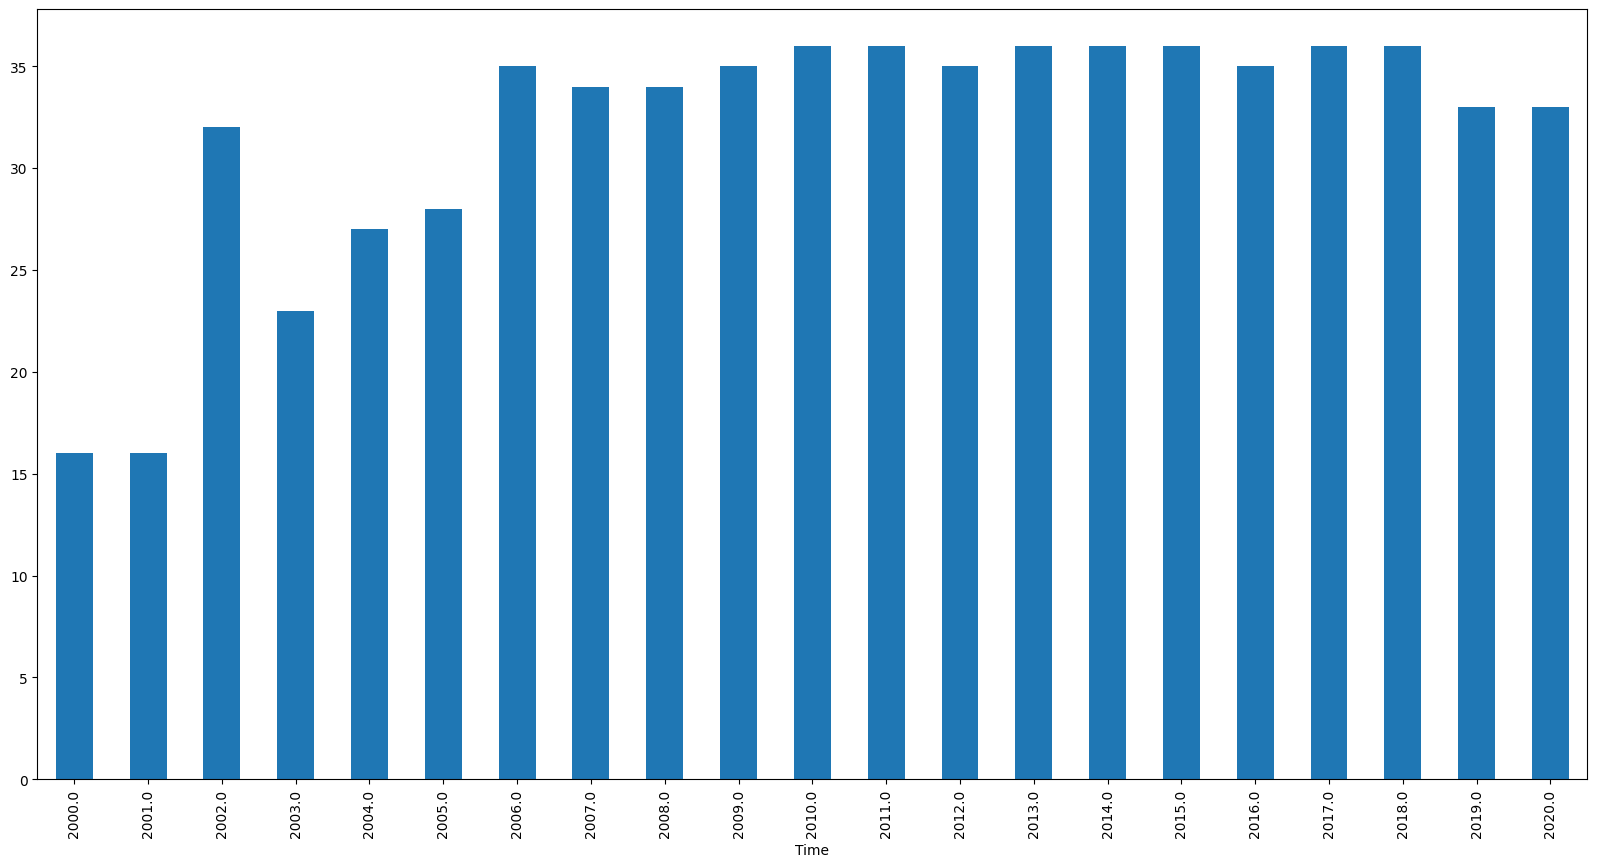

In [58]:
#create counter matrix, for each year show how many unique countries have data
merged_df_knn_imputed.groupby('Time')['Country Code'].nunique().plot(kind='bar', figsize=(20,10))


<AxesSubplot: xlabel='Country Code'>

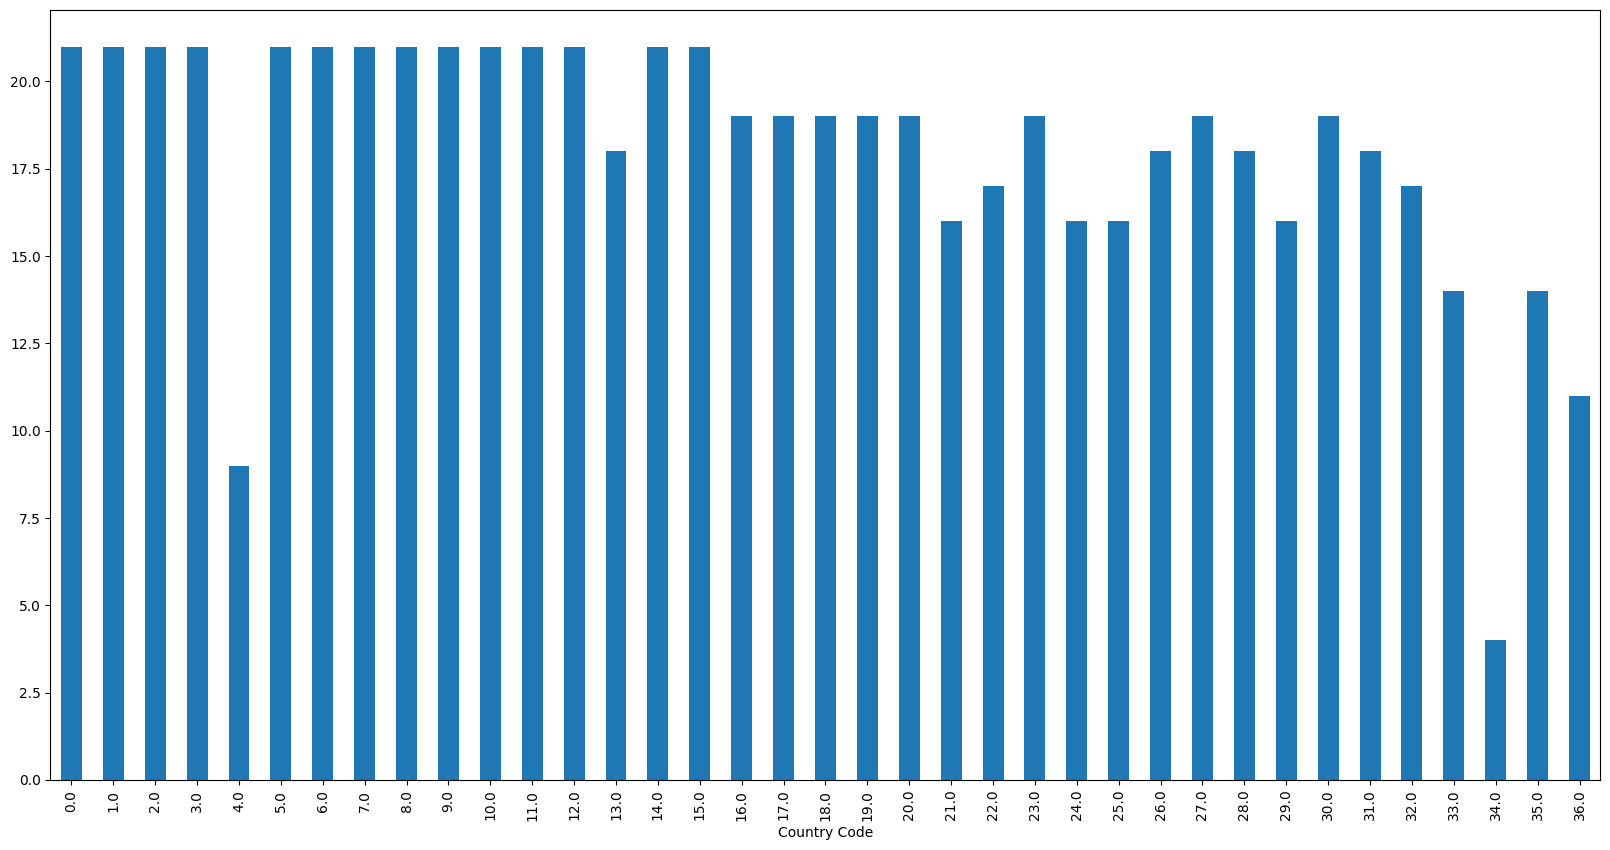

In [59]:
#create counter matrix, for each year show how many unique countries have data
merged_df_knn_imputed.groupby('Country Code')['Time'].nunique().plot(kind='bar', figsize=(20,10))

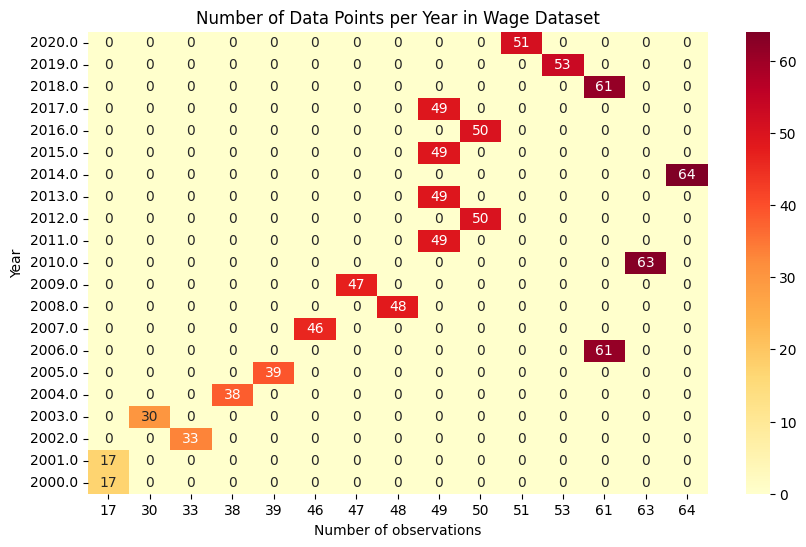

In [60]:
year_counts = merged_df_knn_imputed['Time'].value_counts().sort_index()

# Reshape the data for heatmap visualization and flip the index
year_counts_heatmap = year_counts.reset_index().pivot(index='index', columns='Time', values='Time').fillna(0)[::-1]

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(year_counts_heatmap, cmap='YlOrRd', annot=True, fmt='g', cbar=True)
plt.xlabel('Number of observations')
plt.ylabel('Year')
plt.title('Number of Data Points per Year in Wage Dataset')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8940\100039791.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = observations_per_country_year.pivot('Time', 'Country Code', 'Count')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


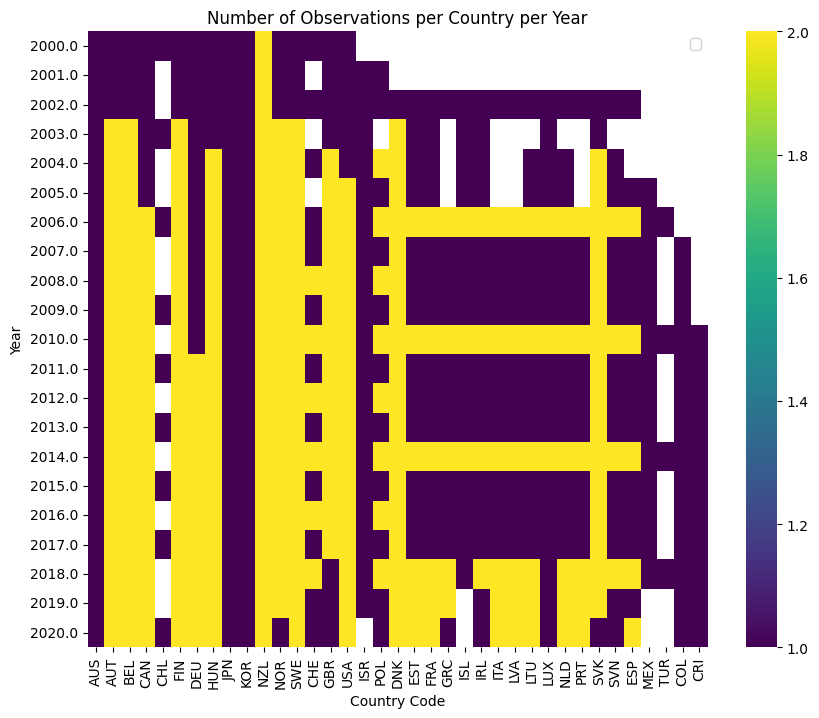

In [61]:
#list that has columns with nulls
cols_with_nulls = merged_df_knn_imputed.columns[merged_df_knn_imputed.isnull().any()].tolist()

# Group by Country and Year, then count the number of entries per group
observations_per_country_year = merged_df_knn_imputed.groupby(['Country Code', 'Time']).size().reset_index(name='Count')

# Pivot this data so that each country is a column, each row is a year, and the values are the counts
pivot_table = observations_per_country_year.pivot('Time', 'Country Code', 'Count')
#replace Country Code in pivot with label encoded values
pivot_table.columns = label_dict.keys()
# Display this as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Number of Observations per Country per Year')
plt.xlabel('Country Code')
plt.ylabel('Year')
plt.legend()
plt.show()


#only keep years 2000 - 2021
merged_df_mode_imputed = merged_df_knn_imputed[merged_df_knn_imputed['Time'] >= 2000]

    We decide to drop years <2000 because they have too mich missing data

In [62]:
def find_common_countries(df):
    # Get the unique years
    unique_years = df['Time'].unique()

    # Initialize the set of common countries with the countries from the first year
    common_countries = set(df[df['Time'] == unique_years[0]]['Country Code'].unique())

    # Iterate through the rest of the years
    for year in unique_years[1:]:
        # Get the set of countries for the current year
        current_year_countries = set(df[df['Time'] == year]['Country Code'].unique())
        # Update the set of common countries to be the intersection of the current set of common countries and the countries of the current year
        common_countries = common_countries.intersection(current_year_countries)

    return common_countries

# Call the function
common_countries = find_common_countries(merged_df_mode_imputed)
common_countries_lbl = []
# Display the common countries with label_dict
for country, code in label_dict.items():
    if code in common_countries:
        common_countries_lbl.append(country) 
print(common_countries_lbl)

['AUS', 'AUT', 'BEL', 'CAN', 'FIN', 'DEU', 'HUN', 'JPN', 'KOR', 'NZL', 'NOR', 'SWE', 'GBR', 'USA']


## Countries with how many years they're missing, should we interpolate?

In [63]:
label_dict.keys()

dict_keys(['AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'FIN', 'DEU', 'HUN', 'JPN', 'KOR', 'NZL', 'NOR', 'SWE', 'CHE', 'GBR', 'USA', 'ISR', 'POL', 'DNK', 'EST', 'FRA', 'GRC', 'ISL', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'NLD', 'PRT', 'SVK', 'SVN', 'ESP', 'MEX', 'TUR', 'COL', 'CRI'])

In [64]:
label_dict_swap = {v: k for k, v in label_dict.items()}
not_common = []
for country in merged_df_mode_imputed['Country Code'].unique():
    if country not in common_countries:
        not_common.append(country)
print(not_common)
missing_years= {}
for country in not_common:
    missing_years_ = set(range(2000, 2022)) - set(merged_df_mode_imputed[merged_df_mode_imputed['Country Code'] == country]['Time'].unique())
    if(len(missing_years_) > 0):
        print(f"{label_dict_swap[country]}: {len(missing_years_)} years missing: {sorted(list(missing_years_))}")
        missing_years[country] = missing_years_

#swap between keys and values of label_dict


[4.0, 13.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0]
CHL: 13 years missing: [2001, 2002, 2004, 2005, 2007, 2008, 2010, 2012, 2014, 2016, 2018, 2019, 2021]
CHE: 4 years missing: [2001, 2003, 2005, 2021]
ISR: 3 years missing: [2000, 2020, 2021]
POL: 3 years missing: [2000, 2003, 2021]
DNK: 3 years missing: [2000, 2001, 2021]
EST: 3 years missing: [2000, 2001, 2021]
FRA: 3 years missing: [2000, 2001, 2021]
GRC: 6 years missing: [2000, 2001, 2003, 2004, 2005, 2021]
ISL: 5 years missing: [2000, 2001, 2019, 2020, 2021]
IRL: 3 years missing: [2000, 2001, 2021]
ITA: 6 years missing: [2000, 2001, 2003, 2004, 2005, 2021]
LVA: 6 years missing: [2000, 2001, 2003, 2004, 2005, 2021]
LTU: 4 years missing: [2000, 2001, 2003, 2021]
LUX: 3 years missing: [2000, 2001, 2021]
NLD: 4 years missing: [2000, 2001, 2003, 2021]
PRT: 6 years missing: [2000, 2001, 2003, 2004, 2005, 2021]
SVK: 3 years missing: [2000, 2001, 2021]
SV

## keep countries with 5 years and less missing, interpolate the rest

In [65]:

common_countries = [country for country, years in missing_years.items() if len(years) <= 5]
filtered_df = merged_df_mode_imputed[merged_df_mode_imputed['Country Code'].isin(common_countries)]

all_years = range(2000, 2022)
all_data = pd.DataFrame([(year, country) for year in all_years for country in common_countries], columns=['Time', 'Country Code'])

merged_df_3 = all_data.merge(filtered_df, on=['Time', 'Country Code'], how='left')

In [66]:
#show unique countries of merged_df_3 in their code form
merged_df_3['Country Code'].unique()



array([13., 16., 17., 18., 19., 20., 22., 23., 26., 27., 28., 30., 31.,
       32.])

In [67]:
merged_df_3

Time  Country Code  \
0    2000          13.0   
1    2000          16.0   
2    2000          17.0   
3    2000          18.0   
4    2000          19.0   
..    ...           ...   
394  2021          27.0   
395  2021          28.0   
396  2021          30.0   
397  2021          31.0   
398  2021          32.0   

     A woman can travel outside her home in the same way as a man (1=yes; 0=no) [SG.HME.TRVL.EQ]  \
0                                                  1.0                                             
1                                                  NaN                                             
2                                                  NaN                                             
3                                                  NaN                                             
4                                                  NaN                                             
..                                                 ...                                             
394                                                NaN                                             
395                                                NaN                                             
396                                                NaN                                             
397                                                NaN                                             
398                                                NaN                                             

     A woman can travel outside the country in the same way as a man (1=yes; 0=no) [SG.CTR.TRVL.EQ]_OG  \
0                                                  1.0                                                   
1                                                  NaN                                                   
2                                                  NaN                                                   
3                                                  NaN                                                   
4                                                  NaN                                                   
..                                                 ...                                                   
394                                                NaN                                                   
395                                                NaN                                                   
396                                                NaN                                                   
397                                                NaN                                                   
398                                                NaN                                                   

     Female share of employment in senior and middle management (%) [SL.EMP.SMGT.FE.ZS]_OG  \
0                                                 22.5                                       
1                                                  NaN                                       
2                                                  NaN                                       
3                                                  NaN                                       
4                                                  NaN                                       
..                                                 ...                                       
394                                                NaN                                       
395                                                NaN                                       
396                                                NaN                                       
397                                                NaN                                       
398                                                NaN                                       

     Proportion of seats held by women in national parliaments (%) [SG.GEN.PA

## KNN Impute missing values

In [68]:
merged_df_3= merged_df_3.sort_values(['Country Code', 'Time'])


In [69]:
#columns that has null values


In [70]:
from sklearn.impute import KNNImputer

# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=1)  # You can adjust the number of neighbors as per your preference

# Select the columns containing missing values that you want to fill
columns_to_fill = merged_df_3.columns[merged_df_3.isnull().any()].tolist()
# Fit and transform the selected columns in your DataFrame
merged_df_3_filled = merged_df_3.copy()  # Make a copy to preserve the original DataFrame
merged_df_3_filled[columns_to_fill] = imputer.fit_transform(merged_df_3_filled[columns_to_fill])

# Note: KNNImputer returns a NumPy array, so the column names and indices might be lost in the process.
# If preserving column names and indices is crucial, you can convert the imputed array back to a DataFrame.



In [71]:
# merged_df_3_filled = merged_df_3.groupby('Country Code',group_keys= False).apply(lambda group: group.interpolate(method='linear', limit_direction='both'))


In [72]:
for col in merged_df_3_filled.columns:
    print(col," , " ,len(merged_df_3_filled[col].unique()))

Time  ,  22
Country Code  ,  14
A woman can travel outside her home in the same way as a man (1=yes; 0=no) [SG.HME.TRVL.EQ]  ,  1
A woman can travel outside the country in the same way as a man (1=yes; 0=no) [SG.CTR.TRVL.EQ]_OG  ,  1
Female share of employment in senior and middle management (%) [SL.EMP.SMGT.FE.ZS]_OG  ,  169
Proportion of seats held by women in national parliaments (%) [SG.GEN.PARL.ZS]_OG  ,  110
Prevalence of overweight, female (% of female adults) [SH.STA.OWAD.FE.ZS]_OG  ,  138
Prevalence of overweight, male (% of male adults) [SH.STA.OWAD.MA.ZS]_OG  ,  135
Women's share of population ages 15+ living with HIV (%) [SH.DYN.AIDS.FE.ZS]_OG  ,  135
Children out of school (% of primary school age) [SE.PRM.UNER.ZS]_OG  ,  247
Female share of graduates in Agriculture, Forestry, Fisheries and Veterinary programmes, tertiary (%) [SE.TER.GRAD.FE.AG.ZS]_OG  ,  205
Female share of graduates in Arts and Humanities programmes, tertiary (%) [SE.TER.GRAD.FE.HU.ZS]_OG  ,  209
Female 

In [73]:
merged_df_3_filled

Time  Country Code  \
0    2000          13.0   
14   2001          13.0   
28   2002          13.0   
42   2003          13.0   
57   2004          13.0   
..    ...           ...   
344  2018          32.0   
364  2019          32.0   
383  2020          32.0   
384  2020          32.0   
398  2021          32.0   

     A woman can travel outside her home in the same way as a man (1=yes; 0=no) [SG.HME.TRVL.EQ]  \
0                                                  1.0                                             
14                                                 1.0                                             
28                                                 1.0                                             
42                                                 1.0                                             
57                                                 1.0                                             
..                                                 ...                                             
344                                                1.0                                             
364                                                1.0                                             
383                                                1.0                                             
384                                                1.0                                             
398                                                1.0                                             

     A woman can travel outside the country in the same way as a man (1=yes; 0=no) [SG.CTR.TRVL.EQ]_OG  \
0                                                  1.0                                                   
14                                                 1.0                                                   
28                                                 1.0                                                   
42                                                 1.0                                                   
57                                                 1.0                                                   
..                                                 ...                                                   
344                                                1.0                                                   
364                                                1.0                                                   
383                                                1.0                                                   
384                                                1.0                                                   
398                                                1.0                                                   

     Female share of employment in senior and middle management (%) [SL.EMP.SMGT.FE.ZS]_OG  \
0                                            22.500000                                       
14                                           31.321203                                       
28                                           24.799999                                       
42                                           31.321203                                       
57                                           24.799999                                       
..                                                 ...                                       
344                                          31.900000                                       
364                                          33.700001                                       
383                                          36.500000                                       
384                                          36.500000                                       
398                                          31.321203                                       

     Proportion of seats held by women in national parliaments (%) [SG.GEN.PA

In [74]:
#null percentage per country
merged_df_3_filled.groupby('Country Code')['Value'].apply(lambda x: x.isnull().sum()/len(x))

Country Code
13.0    0.0
16.0    0.0
17.0    0.0
18.0    0.0
19.0    0.0
20.0    0.0
22.0    0.0
23.0    0.0
26.0    0.0
27.0    0.0
28.0    0.0
30.0    0.0
31.0    0.0
32.0    0.0
Name: Value, dtype: float64

In [75]:
#print df_3_filled unique countries labels from label_dict
for country in merged_df_3_filled['Country Code'].unique():
    print(label_dict_swap[country])



CHE
ISR
POL
DNK
EST
FRA
ISL
IRL
LTU
LUX
NLD
SVK
SVN
ESP


# filled all missing values

In [76]:
merged_df = merged_df_3_filled.copy()


In [77]:
#replace Country Code in merged_df with label encoded values
merged_df['Country Code'] = merged_df['Country Code'].replace(label_dict_swap)

Time                                                                                                 0
Country Code                                                                                         0
A woman can travel outside her home in the same way as a man (1=yes; 0=no) [SG.HME.TRVL.EQ]          0
A woman can travel outside the country in the same way as a man (1=yes; 0=no) [SG.CTR.TRVL.EQ]_OG    0
Female share of employment in senior and middle management (%) [SL.EMP.SMGT.FE.ZS]_OG                0
                                                                                                    ..
Rule of Law: Estimate                                                                                0
Scientific and technical journal articles                                                            0
Unemployment, total (% of total labor force) (modeled ILO estimate)                                  0
Voice and Accountability: Estimate                                       

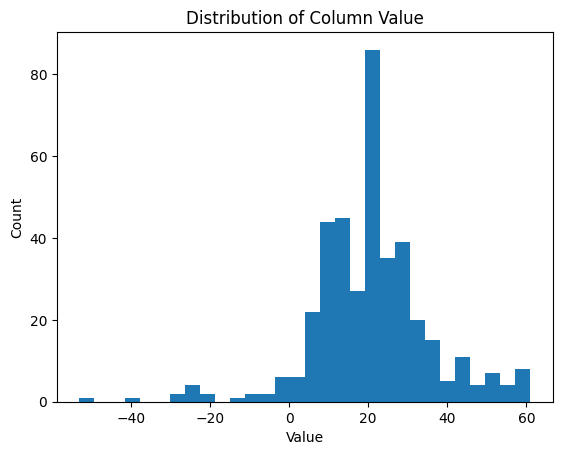

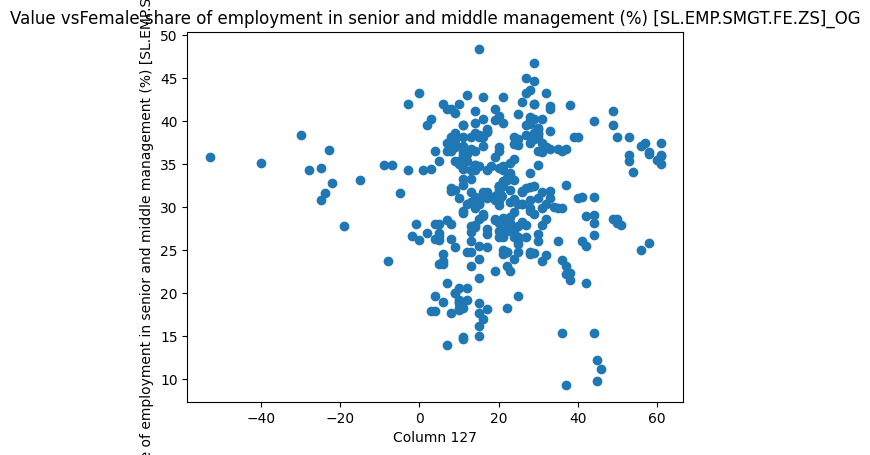

In [78]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Check for missing values
print(merged_df.isnull().sum())

# Perform correlation analysis

# Create a histogram of the "Value" column (column index 127)
plt.hist(merged_df.iloc[:,127], bins=30)
plt.xlabel(merged_df.columns[127])
plt.ylabel('Count')
plt.title('Distribution of Column ' + merged_df.columns[127])
plt.show()

# Create a scatter plot of the "Value" column and another column (for example, column index 4)
plt.scatter(merged_df.iloc[:,127], merged_df.iloc[:,4])
plt.xlabel('Column 127')
plt.ylabel(merged_df.columns[4])
plt.title('Value vs' + merged_df.columns[4])
plt.show() 


## Distributions

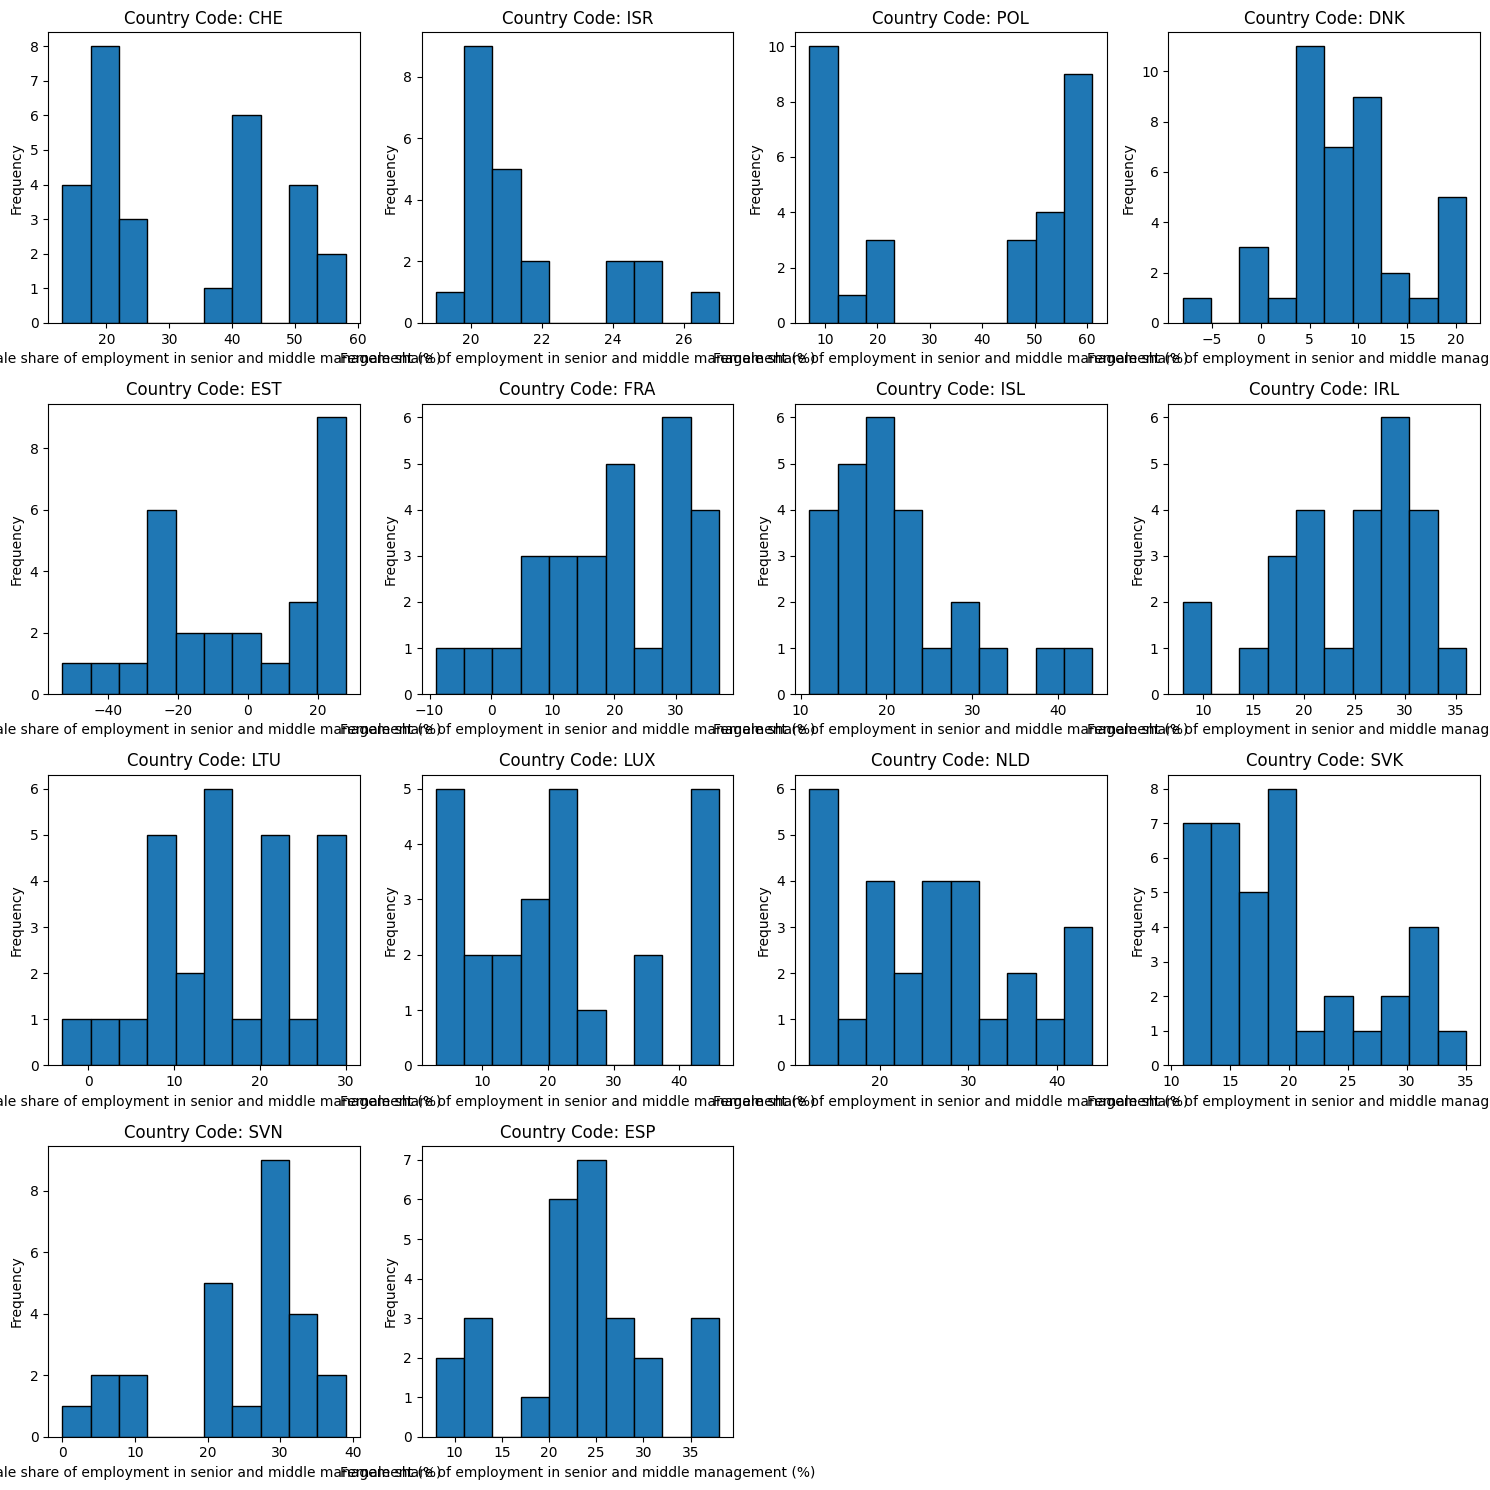

In [79]:
import numpy as np

# Get the unique country codes
unique_countries = merged_df.iloc[:,1].unique()

# Determine the size of the grid
grid_size = int(np.ceil(np.sqrt(len(unique_countries))))

# Create a subplot for each country
fig, axs = plt.subplots(grid_size, grid_size, figsize=(15, 15))

for i, country in enumerate(unique_countries):
    country_data = merged_df[merged_df.iloc[:,1] == country]
    ax = axs[i // grid_size, i % grid_size]
    ax.hist(country_data.iloc[:,127],  edgecolor='black')
    ax.set_title(f'Country Code: {country}')
    ax.set_xlabel('Female share of employment in senior and middle management (%)')
    ax.set_ylabel('Frequency')

# Remove unused subplots
for j in range(i+1, grid_size*grid_size):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()


In [80]:
for i, country in enumerate(unique_countries):
    country_data = merged_df[merged_df.iloc[:,1] == country]
    ax = axs[i // grid_size, i % grid_size]
    ax.hist(country_data.iloc[:,127], bins=20, edgecolor='black')
    ax.set_title(f'Country Code: {country}')
    ax.set_xlabel('Female share of employment in senior and middle management (%)')
    ax.set_ylabel('Frequency')

    # Print explanation
    print(f"Country Code: {country}")


Country Code: CHE
Country Code: ISR
Country Code: POL
Country Code: DNK
Country Code: EST
Country Code: FRA
Country Code: ISL
Country Code: IRL
Country Code: LTU
Country Code: LUX
Country Code: NLD
Country Code: SVK
Country Code: SVN
Country Code: ESP


### Correlation

C:\Users\HP\AppData\Local\Temp\ipykernel_8940\201758121.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(),  cmap='coolwarm')


<AxesSubplot: >

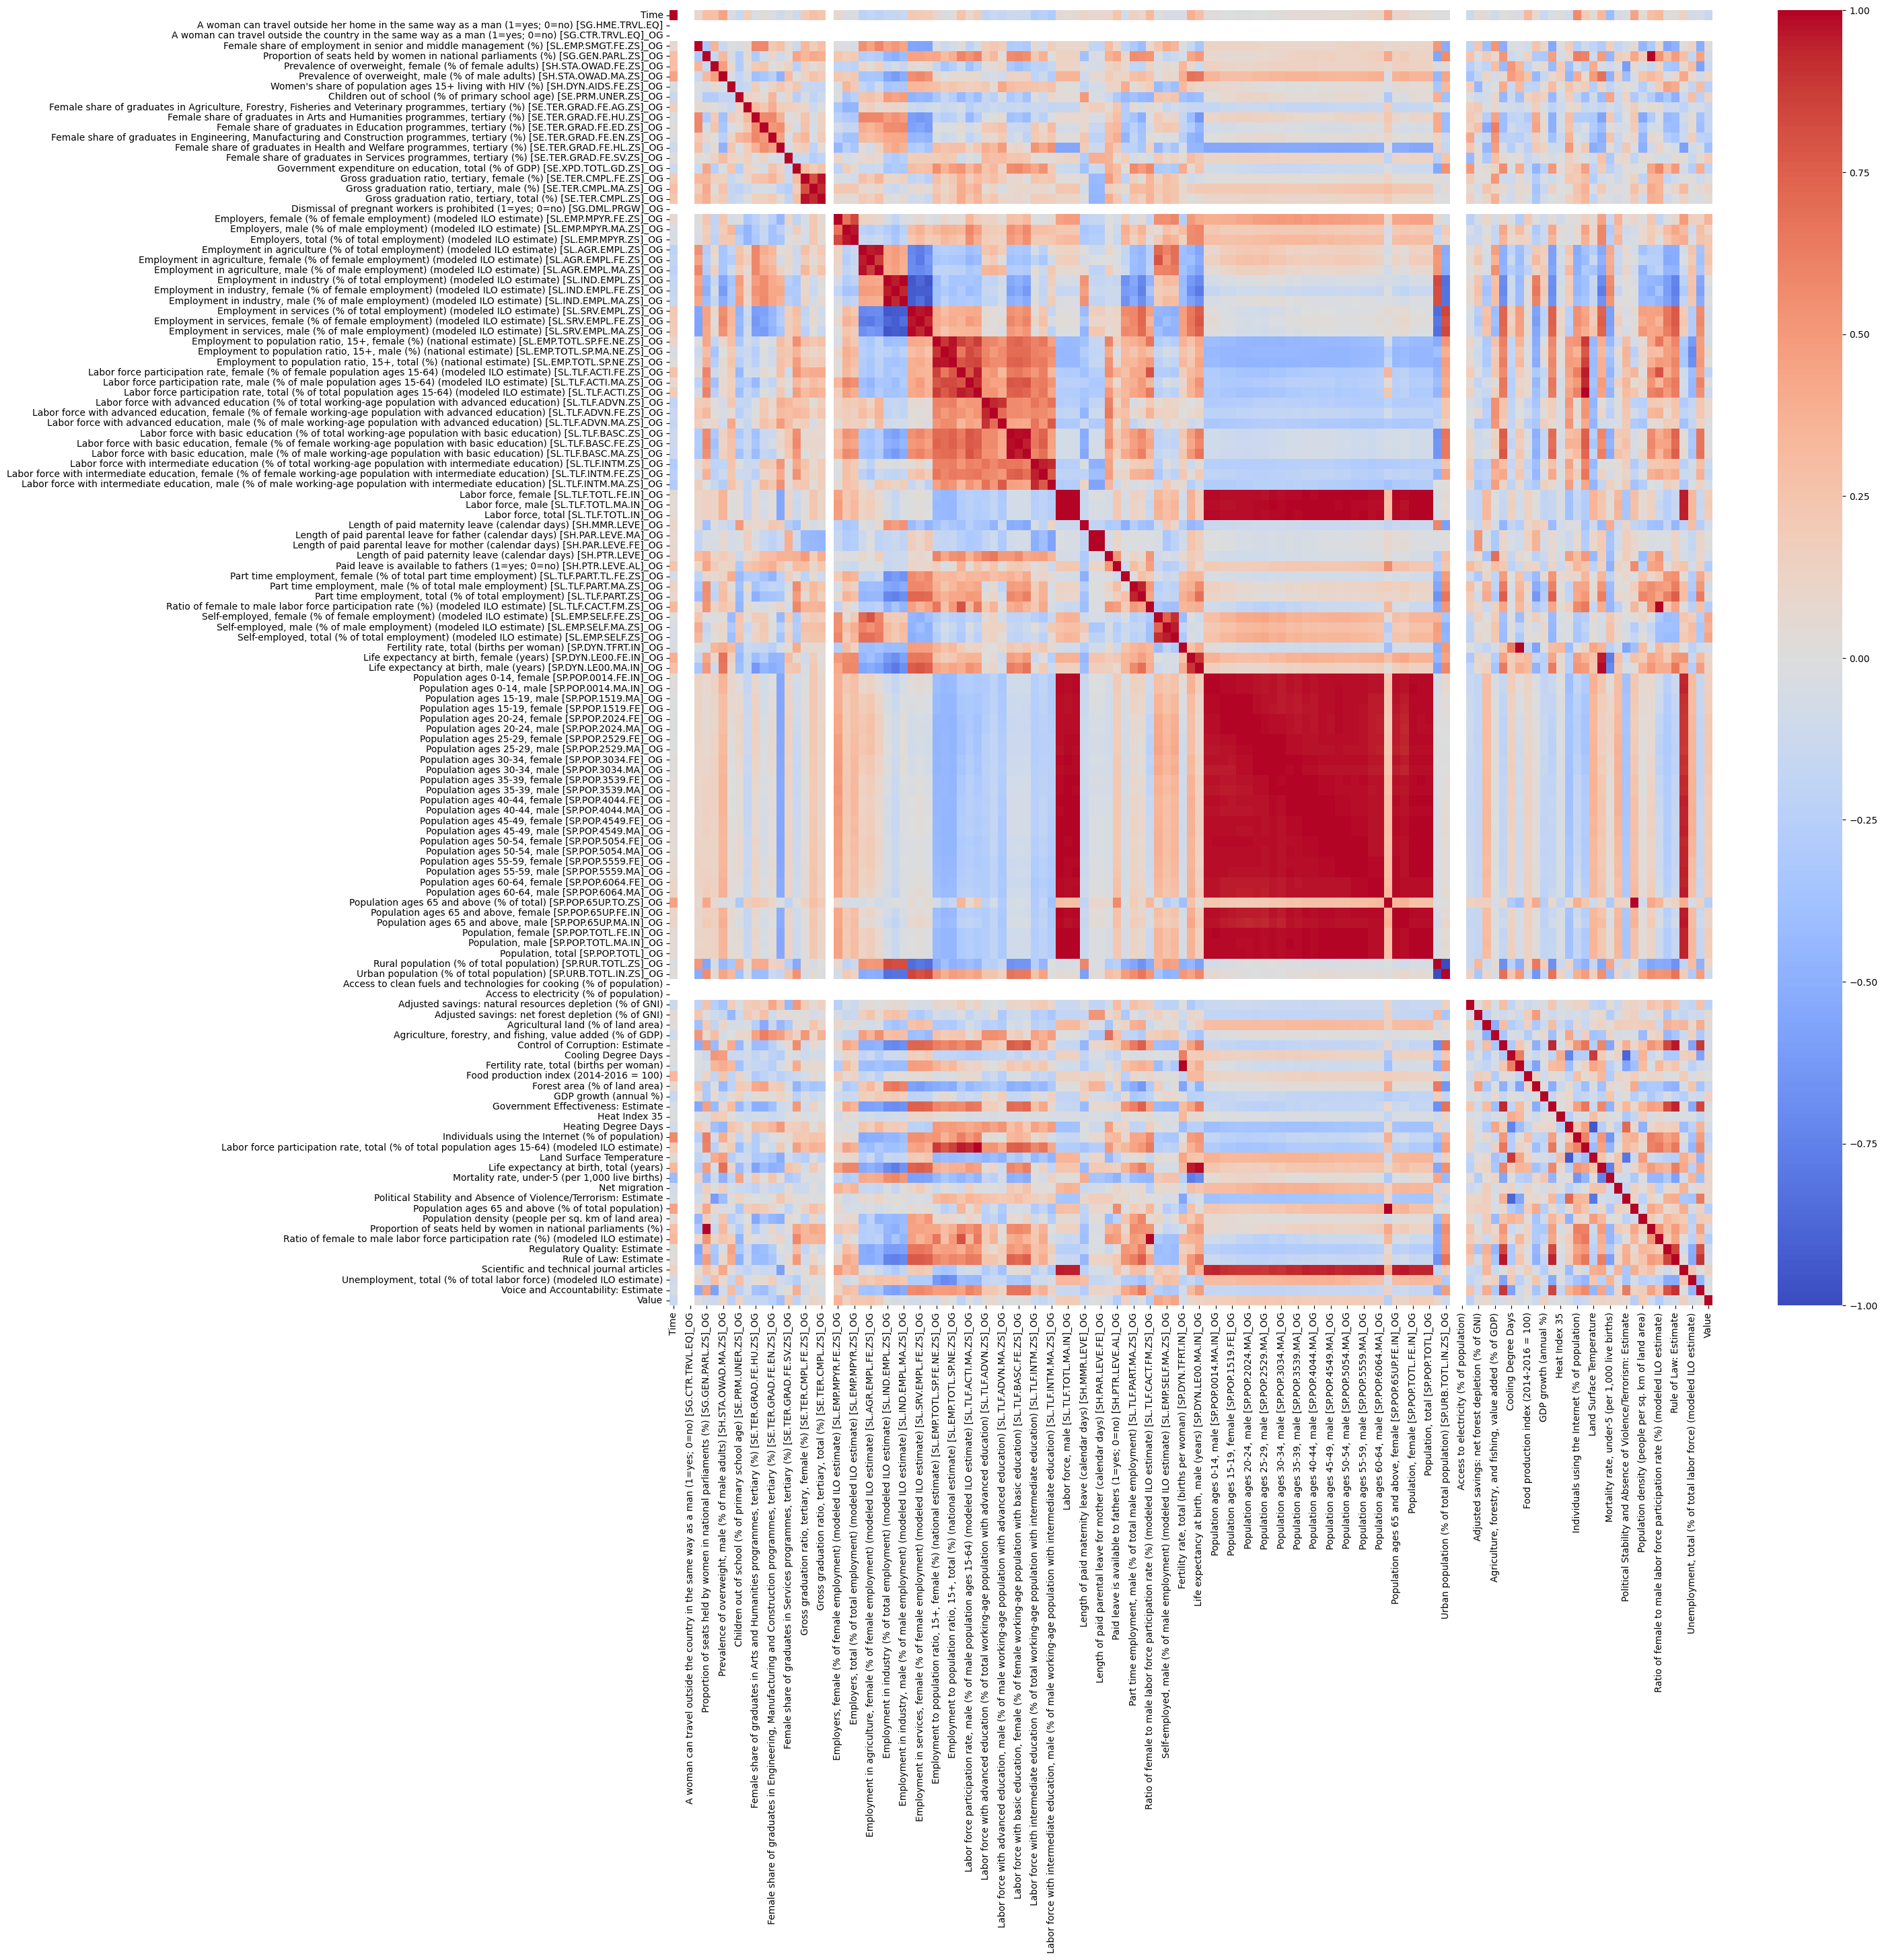

In [81]:
#show correlation heatmap   
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
sns.heatmap(merged_df.corr(),  cmap='coolwarm')


## Treat correlated features

### We will use Lasso for feature selection

In [82]:
#replace merged_df Country Code with label encoded values
merged_df['Country Code'] = merged_df['Country Code'].replace(label_dict)

In [83]:
alphas = [np.logspace(-4, -0.5, 10)]
#change alphas to float
alphas = [float(i) for i in alphas[0]]

from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression

# Assuming X and y are your features and target variable
# X, y = make_regression(noise=4, random_state=0)
X = merged_df.drop(columns=['Value'])
y = merged_df['Value']
# Create a LassoCV object
lasso = LassoCV(cv=5, random_state=0,alphas=alphas)

# Fit the model to your data
lasso.fit(X, y)

# The amount of penalization chosen by cross validation
print("Best alpha using built-in LassoCV: %f" % lasso.alpha_)

# The coefficients of the features in the decision function.
coef = pd.Series(lasso.coef_, index = X.columns)

# Number of chosen features
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

# You can also print out the chosen features
important_features = [feature for feature, weight in zip(X.columns, lasso.coef_) if weight != 0]
print("Important features: ", important_features)


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14933.10504471343, tolerance: 5.866193757101975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13940.691189060879, tolerance: 5.866193757101975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Obje

Best alpha using built-in LassoCV: 0.316228
Lasso picked 71 variables and eliminated the other 56 variables
Important features:  ['Time', 'Country Code', 'Female share of employment in senior and middle management (%) [SL.EMP.SMGT.FE.ZS]_OG', 'Prevalence of overweight, male (% of male adults) [SH.STA.OWAD.MA.ZS]_OG', "Women's share of population ages 15+ living with HIV (%) [SH.DYN.AIDS.FE.ZS]_OG", 'Female share of graduates in Agriculture, Forestry, Fisheries and Veterinary programmes, tertiary (%) [SE.TER.GRAD.FE.AG.ZS]_OG', 'Female share of graduates in Arts and Humanities programmes, tertiary (%) [SE.TER.GRAD.FE.HU.ZS]_OG', 'Female share of graduates in Education programmes, tertiary (%) [SE.TER.GRAD.FE.ED.ZS]_OG', 'Female share of graduates in Health and Welfare programmes, tertiary (%) [SE.TER.GRAD.FE.HL.ZS]_OG', 'Female share of graduates in Services programmes, tertiary (%) [SE.TER.GRAD.FE.SV.ZS]_OG', 'Gross graduation ratio, tertiary, female (%) [SE.TER.CMPL.FE.ZS]_OG', 'Emplo

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17221.94360237807, tolerance: 8.247447282175852
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17132.506231574258, tolerance: 8.247447282175852
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Obje

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.434e+04, tolerance: 9.178e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\AppData\Local\Temp\ipykernel_8940\3208244886.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.barh(importances_df['Feature'][:5], importances_df['Importance'][:5])


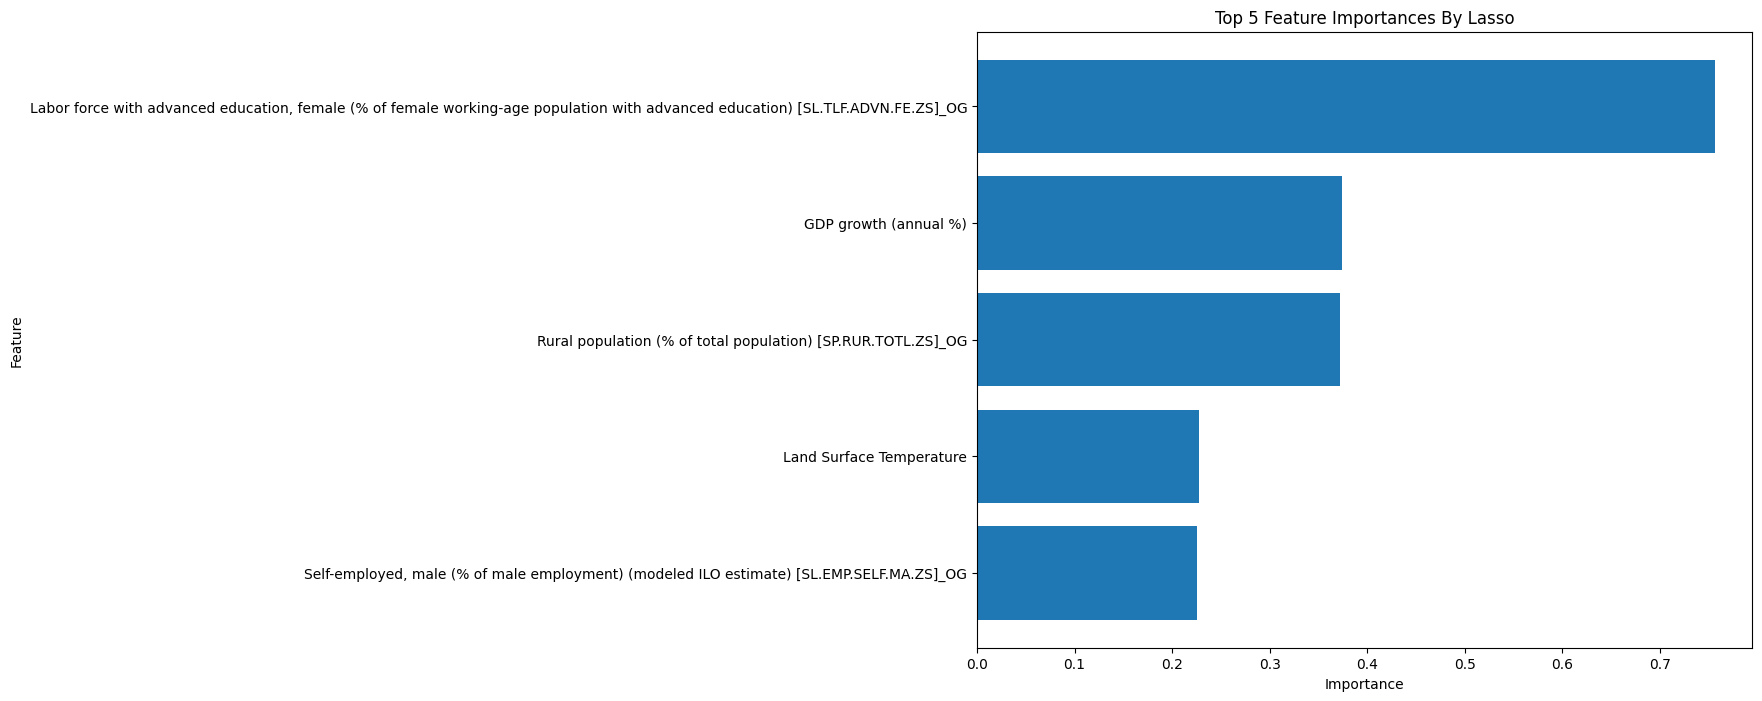

In [84]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Fit the Lasso model
lasso = Lasso(alpha=0.316228)
lasso.fit(X, y)

# Get the feature importances
importances = lasso.coef_

# Convert the importances into a DataFrame
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'][:5], importances_df['Importance'][:5])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Feature Importances By Lasso')
plt.gca().invert_yaxis()
plt.show()





In [85]:

# The coefficients of the features in the decision function.
coef = pd.Series(lasso.coef_, index = X.columns)

# Number of chosen features
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 71 variables and eliminated the other 56 variables


In [86]:

#remove the features with zero importance automatically in a loop
zero_importance_features = importances_df[importances_df['Importance'] == 0.0]
print('There are {} features with zero importance'.format(len(zero_importance_features)))


There are 56 features with zero importance


In [87]:
merged_df

Time  Country Code  \
0    2000            13   
14   2001            13   
28   2002            13   
42   2003            13   
57   2004            13   
..    ...           ...   
344  2018            32   
364  2019            32   
383  2020            32   
384  2020            32   
398  2021            32   

     A woman can travel outside her home in the same way as a man (1=yes; 0=no) [SG.HME.TRVL.EQ]  \
0                                                  1.0                                             
14                                                 1.0                                             
28                                                 1.0                                             
42                                                 1.0                                             
57                                                 1.0                                             
..                                                 ...                                             
344                                                1.0                                             
364                                                1.0                                             
383                                                1.0                                             
384                                                1.0                                             
398                                                1.0                                             

     A woman can travel outside the country in the same way as a man (1=yes; 0=no) [SG.CTR.TRVL.EQ]_OG  \
0                                                  1.0                                                   
14                                                 1.0                                                   
28                                                 1.0                                                   
42                                                 1.0                                                   
57                                                 1.0                                                   
..                                                 ...                                                   
344                                                1.0                                                   
364                                                1.0                                                   
383                                                1.0                                                   
384                                                1.0                                                   
398                                                1.0                                                   

     Female share of employment in senior and middle management (%) [SL.EMP.SMGT.FE.ZS]_OG  \
0                                            22.500000                                       
14                                           31.321203                                       
28                                           24.799999                                       
42                                           31.321203                                       
57                                           24.799999                                       
..                                                 ...                                       
344                                          31.900000                                       
364                                          33.700001                                       
383                                          36.500000                                       
384                                          36.500000                                       
398                                          31.321203                                       

     Proportion of seats held by women in national parliaments (%) [SG.GEN.PA

In [88]:
zero_importance_features

Feature  Importance
123                              Rule of Law: Estimate        -0.0
65   Life expectancy at birth, male (years) [SP.DYN...        -0.0
64   Life expectancy at birth, female (years) [SP.D...        -0.0
122                       Regulatory Quality: Estimate         0.0
62   Self-employed, total (% of total employment) (...         0.0
114            Life expectancy at birth, total (years)        -0.0
118  Population ages 65 and above (% of total popul...        -0.0
112  Labor force participation rate, total (% of to...        -0.0
117  Political Stability and Absence of Violence/Te...         0.0
88   Population ages 65 and above (% of total) [SP....        -0.0
60   Self-employed, female (% of female employment)...         0.0
96   Access to clean fuels and technologies for coo...         0.0
97             Access to electricity (% of population)         0.0
98   Adjusted savings: natural resources depletion ...        -0.0
99   Adjusted savings: net forest depletion (% of GNI)         0.0
101  Agriculture, forestry, and fishing, value adde...        -0.0
102                    Control of Corruption: Estimate        -0.0
104           Fertility rate, total (births per woman)         0.0
108                 Government Effectiveness: Estimate         0.0
109                                      Heat Index 35        -0.0
115    Mortality rate, under-5 (per 1,000 live births)         0.0
63   Fertility rate, total (births per woman) [SP.D...         0.0
126                 Voice and Accountability: Estimate         0.0
30   Employment in services (% of total employment)...        -0.0
35   Employment to population ratio, 15+, total (%)...         0.0
32   Employment in services, male (% of male employ...         0.0
31   Employment in services, female (% of female em...        -0.0
5    Proportion of seats held by women in national ...         0.0
6    Prevalence of overweight, female (% of female ...        -0.0
28   Employment in industry, female (% of female em...         0.0
27   Employment in industry (% of total employment)...         0.0
26   Employment in agriculture, male (% of male emp...         0.0
25   Employment in agriculture, female (% of female...        -0.0
24   Employment in agriculture (% of total employme...        -0.0
23   Employers, total (% of total employment) (mode...        -0.0
22   Employers, male (% of male employment) (modele...        -0.0
21   Employers, female (% of female employment) (mo...         0.0
9    Children out of school (% of primary school ag...         0.0
13   Female share of graduates in Engineering, Manu...         0.0
20   Dismissal of pregnant workers is prohibited (1...         0.0
19   Gross graduation ratio, tertiary, total (%) [S...         0.0
18   Gross graduation ratio, tertiary, male (%) [SE...         0.0
33   Employment to population ratio, 15+, female (%...         0.0
16   Government expenditure on education, total (% ...        -0.0
44   Labor force with basic education, male (% of m...         0.0
3    A woman can travel outside the country in the ...         0.0
36   Labor force participation rate, female (% of f...        -0.0
56   Part time employment, female (% of total part ...         0.0
55   Paid leave is available to fathers (1=yes; 0=n...        -0.0
37   Labor force participation rate, male (% of mal...        -0.0
38   Labor force participation rate, total (% of to...        -0.0
54   Length of paid paternity leave (calendar days)...        -0.0
41   Labor force with advanced education, male (% o...         0.0
47   Labor force with intermediate education, male ...        -0.0
42   Labor force with basic education (% of total w...        -0.0
2    A woman can travel outside her home in the sam...         0.0

In [89]:
for col in zero_importance_features['Feature']:
    if col in merged_df.columns:
        merged_df.drop(col, axis=1, inplace=True)
        

In [90]:
merged_df

Time  Country Code  \
0    2000            13   
14   2001            13   
28   2002            13   
42   2003            13   
57   2004            13   
..    ...           ...   
344  2018            32   
364  2019            32   
383  2020            32   
384  2020            32   
398  2021            32   

     Female share of employment in senior and middle management (%) [SL.EMP.SMGT.FE.ZS]_OG  \
0                                            22.500000                                       
14                                           31.321203                                       
28                                           24.799999                                       
42                                           31.321203                                       
57                                           24.799999                                       
..                                                 ...                                       
344                                          31.900000                                       
364                                          33.700001                                       
383                                          36.500000                                       
384                                          36.500000                                       
398                                          31.321203                                       

     Prevalence of overweight, male (% of male adults) [SH.STA.OWAD.MA.ZS]_OG  \
0                                            55.300000                          
14                                           62.069799                          
28                                           56.300000                          
42                                           62.069799                          
57                                           57.300000                          
..                                                 ...                          
344                                          68.200000                          
364                                          68.200000                          
383                                          68.200000                          
384                                          68.200000                          
398                                          62.069799                          

     Women's share of population ages 15+ living with HIV (%) [SH.DYN.AIDS.FE.ZS]_OG  \
0                                            26.800000                                 
14                                           24.967622                                 
28                                           27.000000                                 
42                                           24.967622                                 
57                                           27.100000                                 
..                                                 ...                                 
344                                          18.100000                                 
364                                          18.000000                                 
383                                          17.900000                                 
384                                          17.900000                                 
398                                          24.967622                                 

     Female share of graduates in Agriculture, Forestry, Fisheries and Veterinary programmes, tertiary (%) [SE.TER.GRAD.FE.AG.ZS]_OG  \
0                                            25.502510                                                                                 
14                                           50.151879                                                                                 
28                                           25.921790                                                           

# Before removing correlated

<AxesSubplot: >

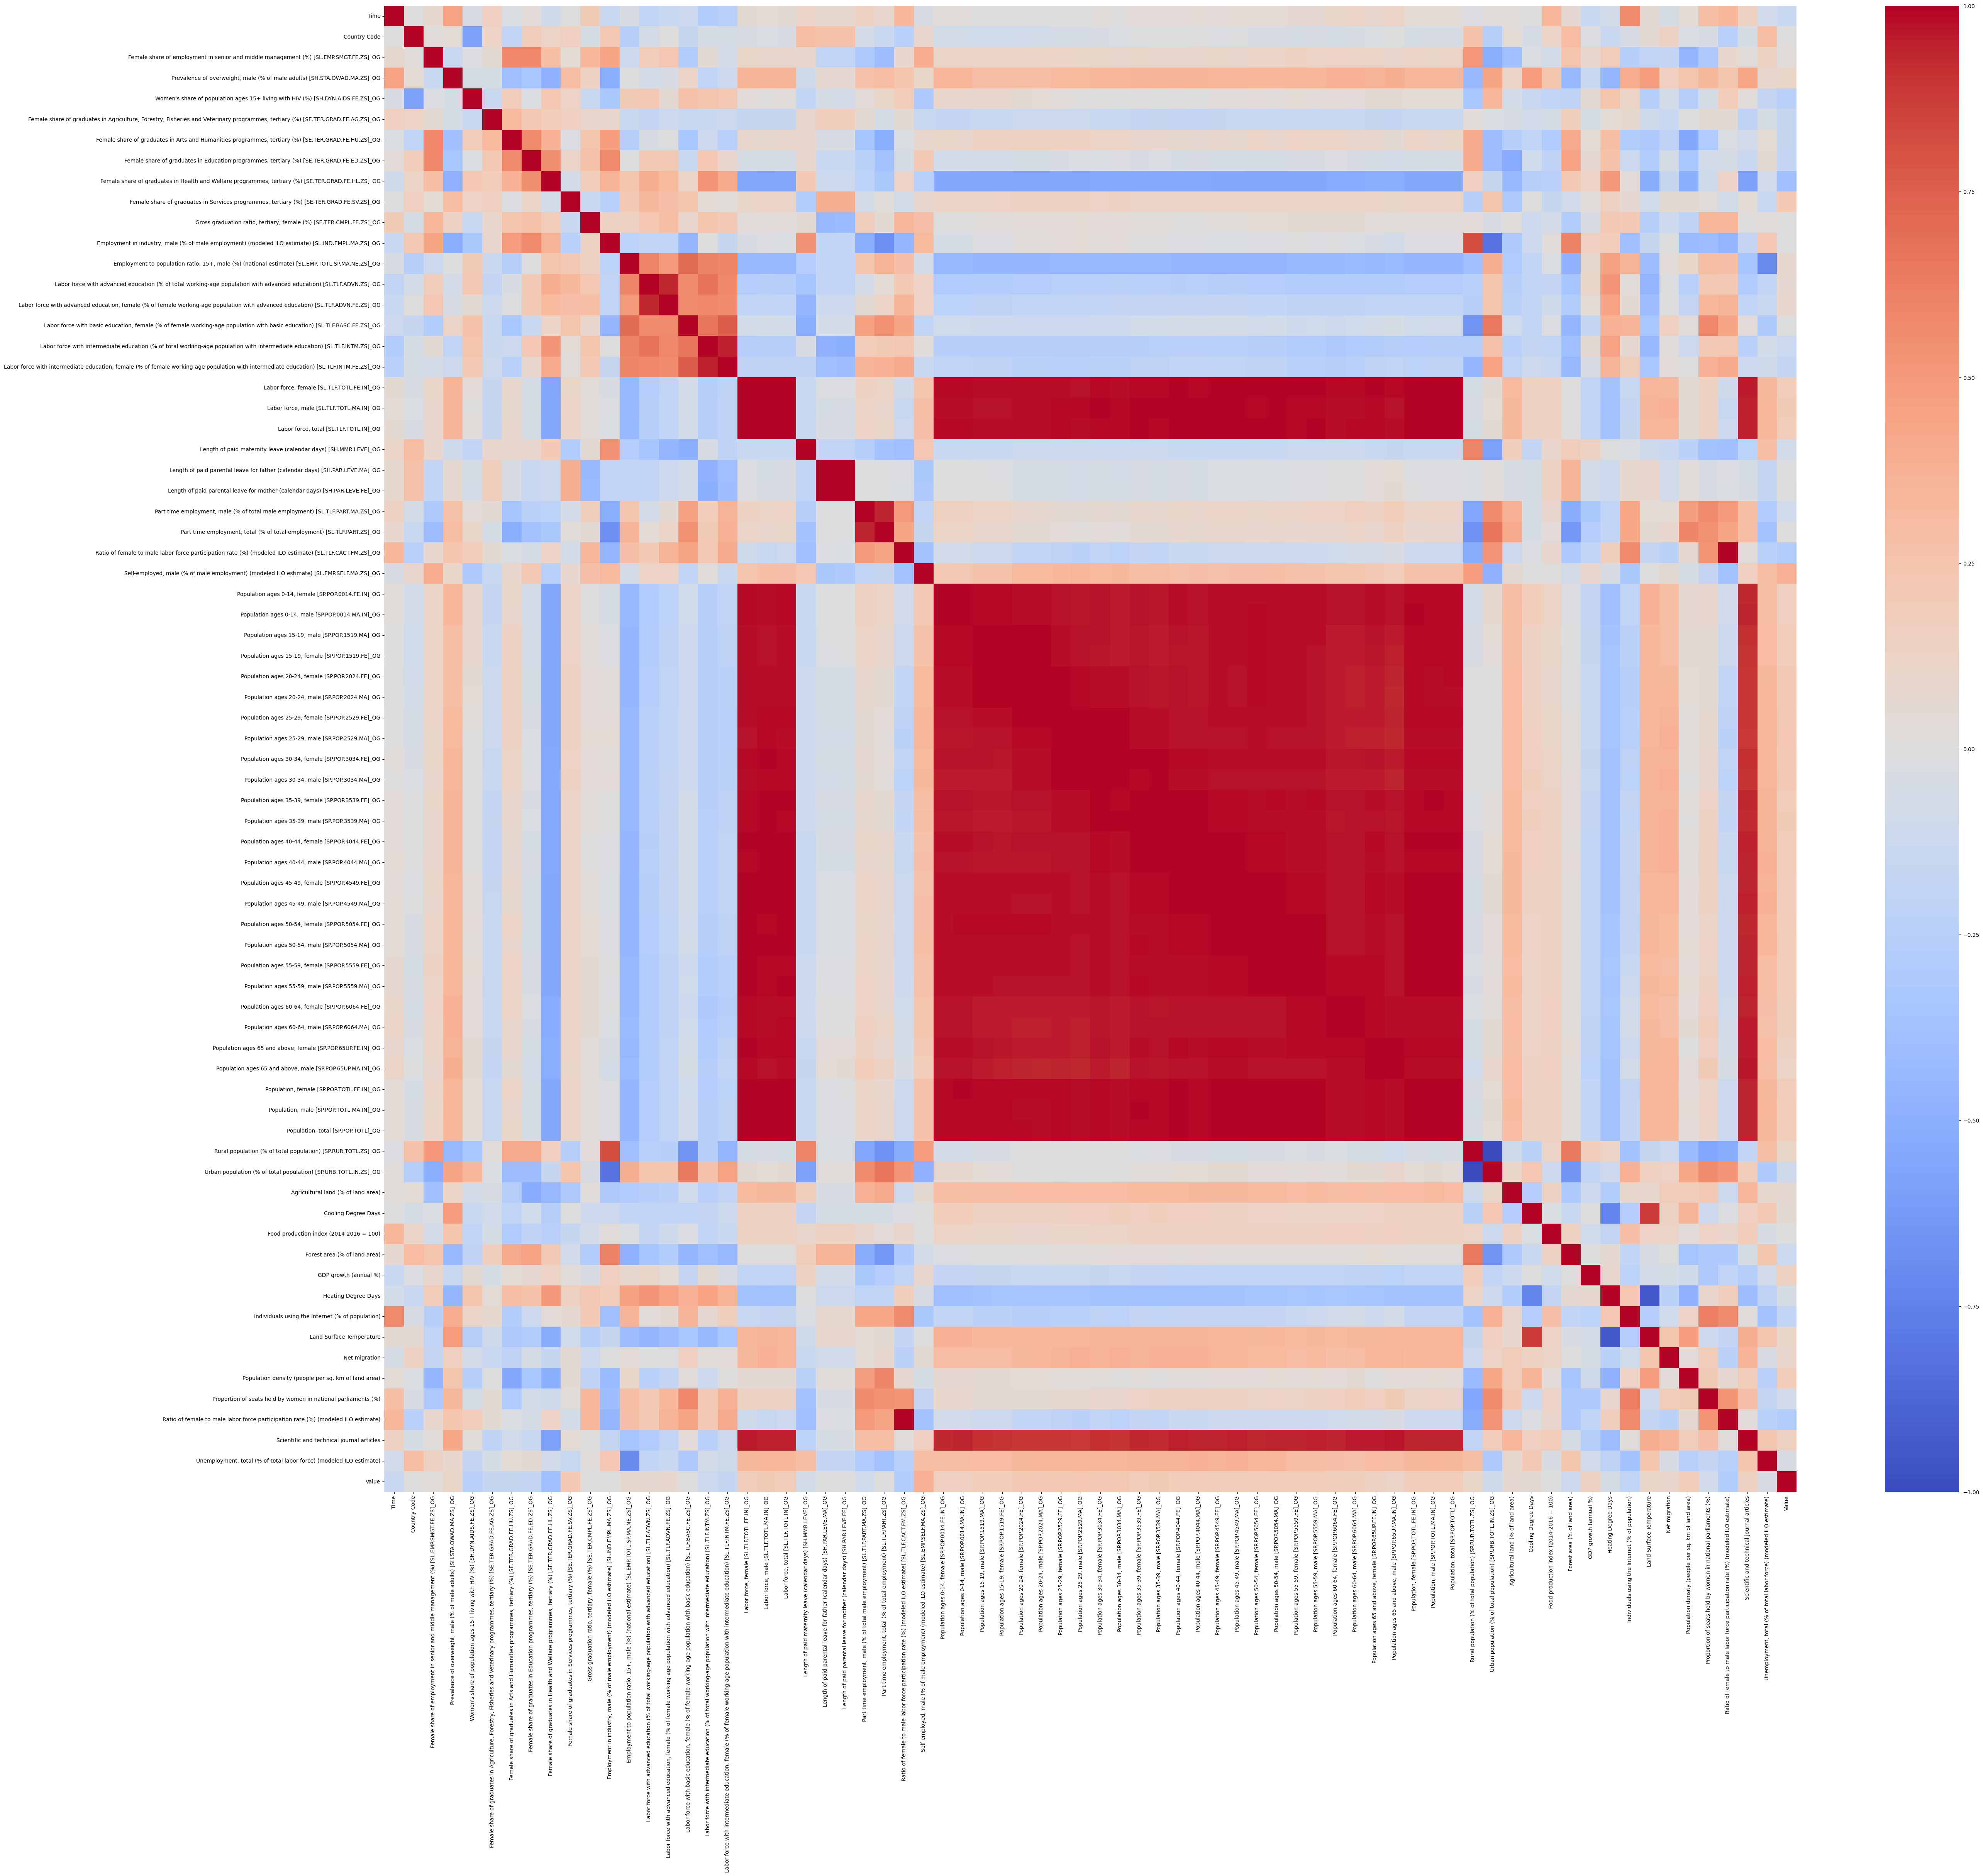

In [91]:
#show correlation heatmap   
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(59,50))
sns.heatmap(merged_df.corr(),  cmap='coolwarm')


# After removing correlated ( this should be in correlation section) but doing it here for manipulation

In [92]:
#drop columns that has 'population ages'
for col in merged_df.columns:
    if 'Population ages' in col:
        merged_df = merged_df.drop(col, axis=1)
#drop Self-employed, total
for col in merged_df.columns:
    if 'Self-employed, total ' in col:
        merged_df = merged_df.drop(col, axis=1)

In [93]:
merged_df

Time  Country Code  \
0    2000            13   
14   2001            13   
28   2002            13   
42   2003            13   
57   2004            13   
..    ...           ...   
344  2018            32   
364  2019            32   
383  2020            32   
384  2020            32   
398  2021            32   

     Female share of employment in senior and middle management (%) [SL.EMP.SMGT.FE.ZS]_OG  \
0                                            22.500000                                       
14                                           31.321203                                       
28                                           24.799999                                       
42                                           31.321203                                       
57                                           24.799999                                       
..                                                 ...                                       
344                                          31.900000                                       
364                                          33.700001                                       
383                                          36.500000                                       
384                                          36.500000                                       
398                                          31.321203                                       

     Prevalence of overweight, male (% of male adults) [SH.STA.OWAD.MA.ZS]_OG  \
0                                            55.300000                          
14                                           62.069799                          
28                                           56.300000                          
42                                           62.069799                          
57                                           57.300000                          
..                                                 ...                          
344                                          68.200000                          
364                                          68.200000                          
383                                          68.200000                          
384                                          68.200000                          
398                                          62.069799                          

     Women's share of population ages 15+ living with HIV (%) [SH.DYN.AIDS.FE.ZS]_OG  \
0                                            26.800000                                 
14                                           24.967622                                 
28                                           27.000000                                 
42                                           24.967622                                 
57                                           27.100000                                 
..                                                 ...                                 
344                                          18.100000                                 
364                                          18.000000                                 
383                                          17.900000                                 
384                                          17.900000                                 
398                                          24.967622                                 

     Female share of graduates in Agriculture, Forestry, Fisheries and Veterinary programmes, tertiary (%) [SE.TER.GRAD.FE.AG.ZS]_OG  \
0                                            25.502510                                                                                 
14                                           50.151879                                                                                 
28                                           25.921790                                                           

<AxesSubplot: >

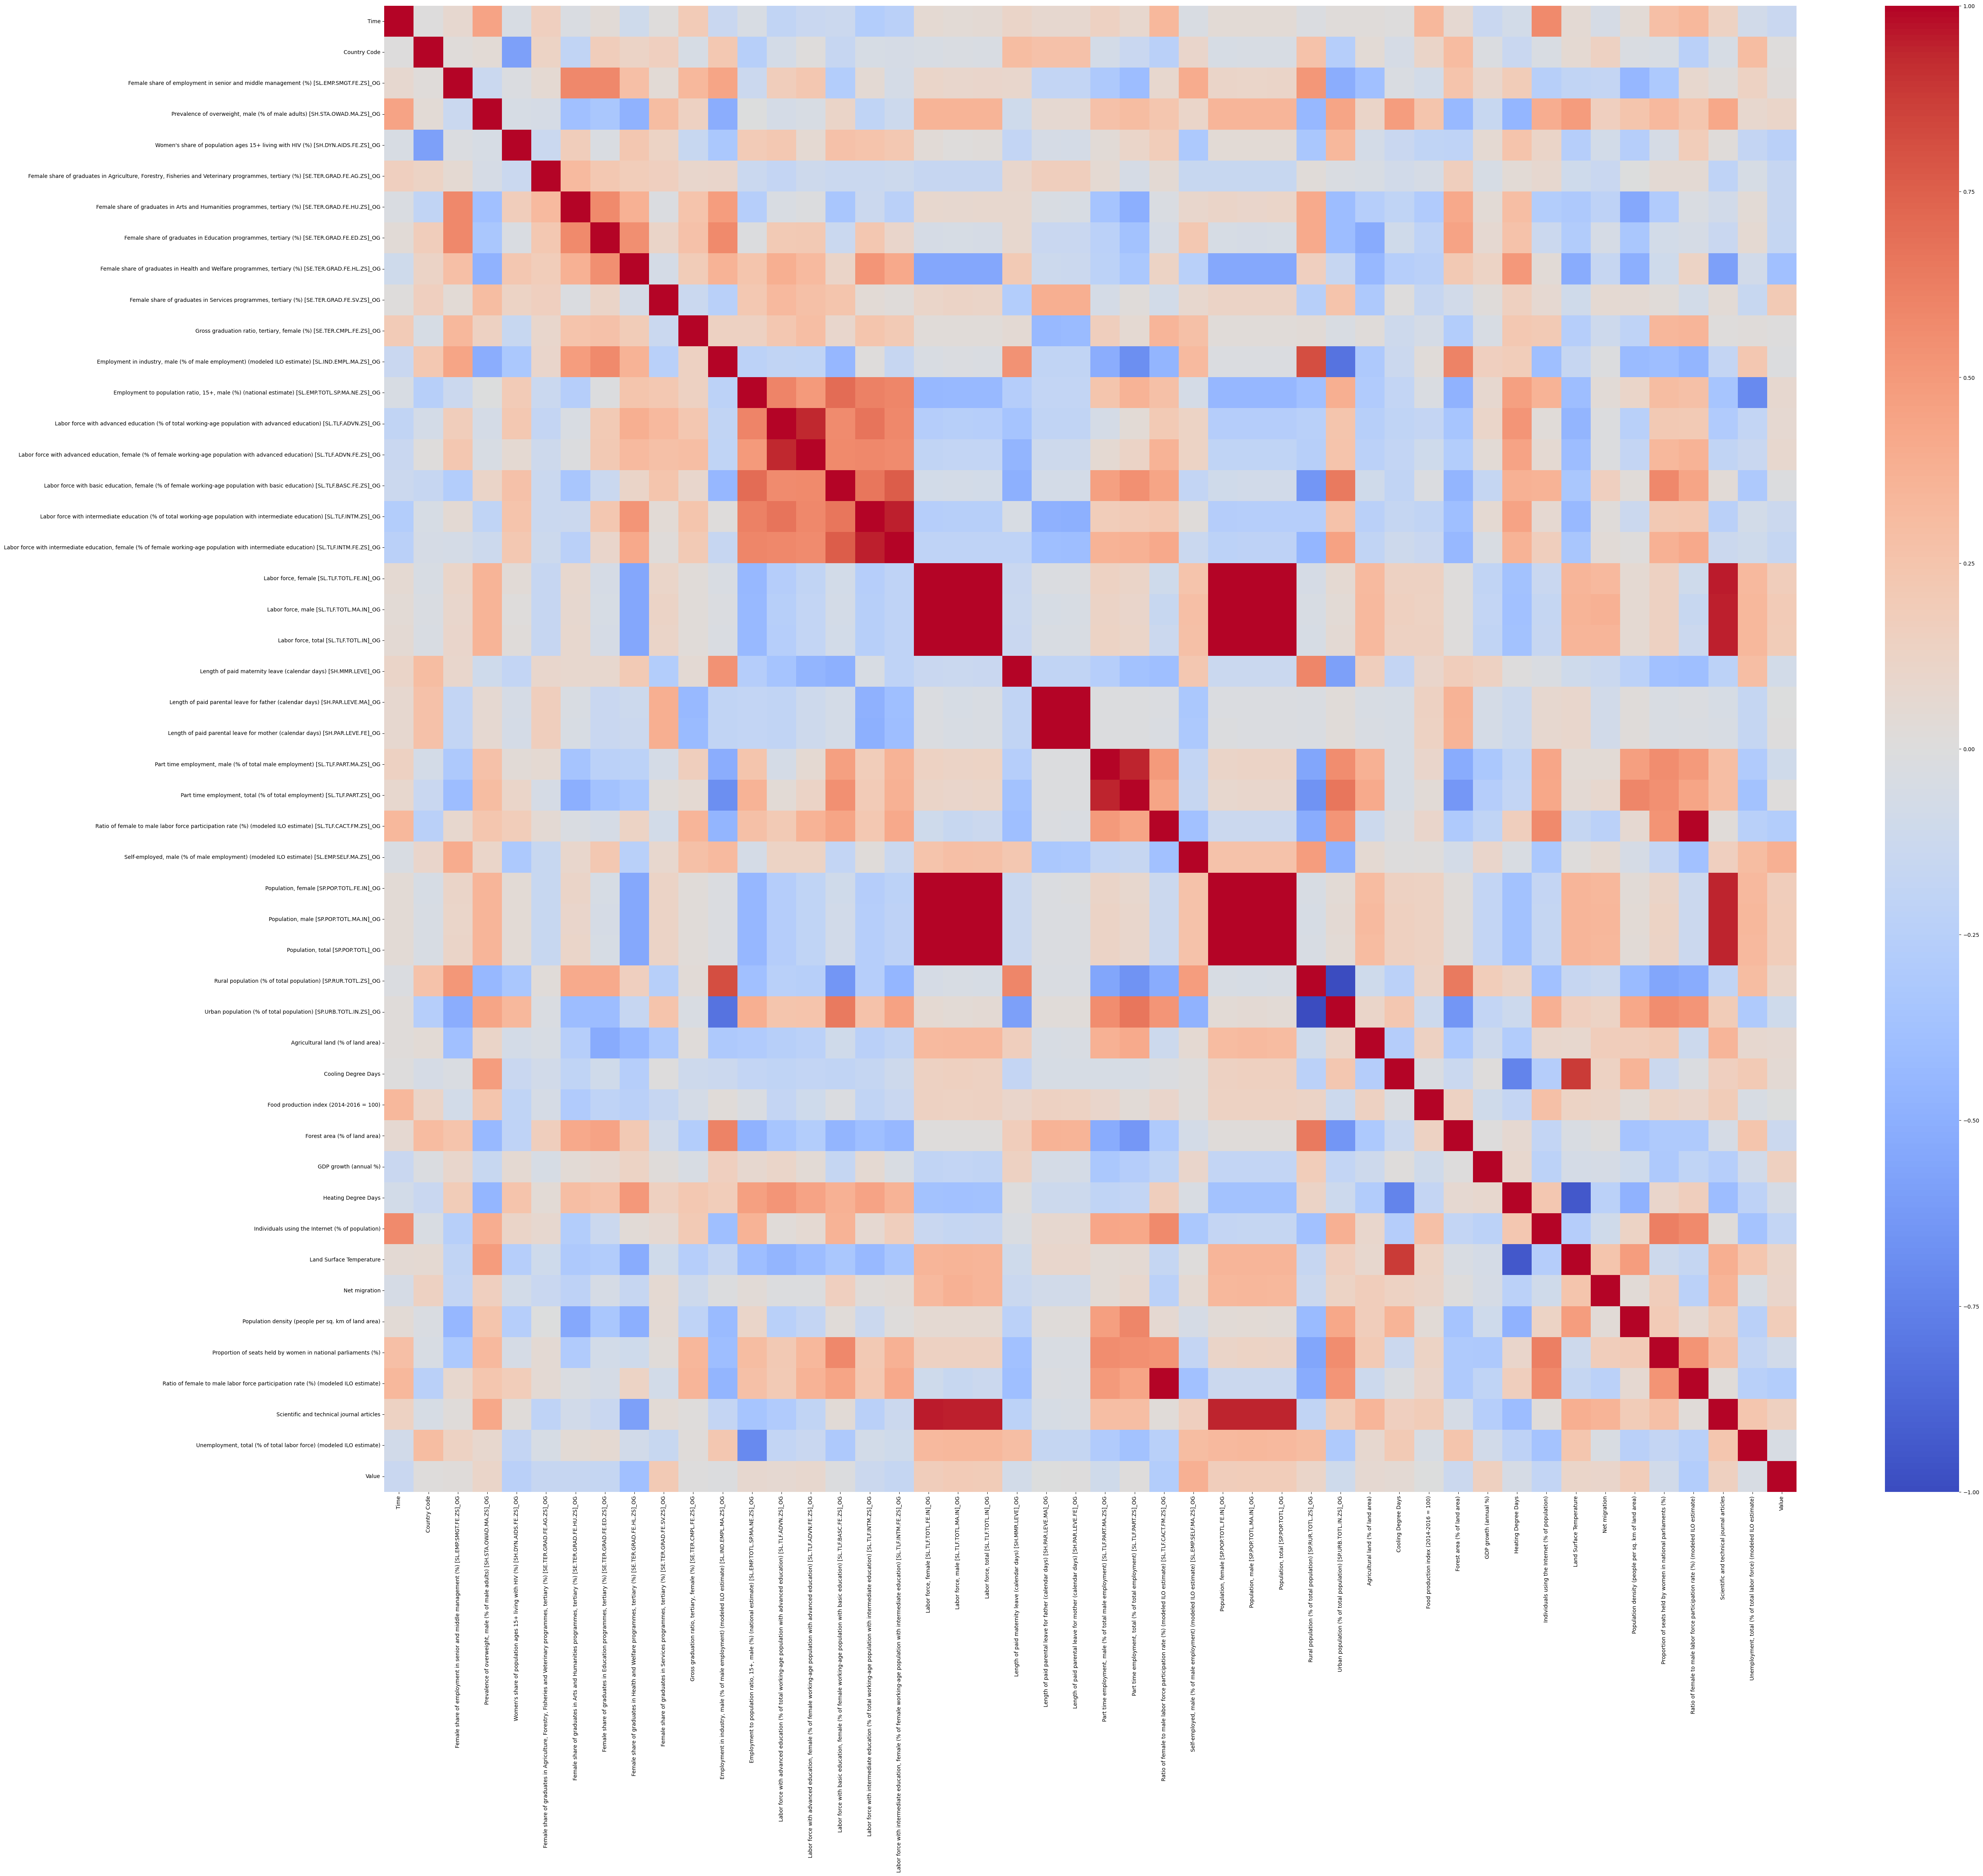

In [94]:
#show correlation heatmap   
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(59,50))
sns.heatmap(merged_df.corr(),  cmap='coolwarm')


In [95]:
#switch country code with label encoded values
merged_df['Country Code'] = merged_df['Country Code'].replace(label_dict_swap)


In [96]:
column_names = {
    'Female share of employment in senior and middle management (%) ': 'Female Senior Mgmt Share',
    'Prevalence of overweight, female (% of female adults) ': 'Female Overweight Prevalence',
    'Women\'s share of population ages 15+ living with HIV (%) ': 'Females with HIV+ Share',
    'Female share of graduates in Agriculture, Forestry, Fisheries and Veterinary programmes, tertiary (%) ': 'Female Agriculture Grads Share',
    'Female share of graduates in Education programmes, tertiary (%) ': 'Female Edu Grads Share',
    'Female share of graduates in Engineering, Manufacturing and Construction programmes, tertiary (%) ': 'Female Engineering Grads Share',
    'Female share of graduates in Health and Welfare programmes, tertiary (%) ': 'Female Health Grads Share',
    'Female share of graduates in Services programmes, tertiary (%) ': 'Female Services Grads Share',
    'Government expenditure on education, total (% of GDP) ': 'Govt Edu Expenditure',
    'Gross graduation ratio, tertiary, female (%) ': 'Female Graduation Ratio',
    'Employment in industry, male (% of male employment) (modeled ILO estimate) ': 'Male Industry Employment',
    'Employment in services, female (% of female employment) (modeled ILO estimate) ': 'Female Services Employment',
    'Employment in services, male (% of male employment) (modeled ILO estimate) ': 'Male Services Employment',
    'Employment to population ratio, 15+, male (%) (national estimate) ': 'Male Employment Ratio',
    'Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate) ': 'Male Labor Force Participation',
    'Labor force with advanced education (% of total working-age population with advanced education) ': 'Advanced Edu Labor Force',
    'Labor force with advanced education, female (% of female working-age population with advanced education) ': 'Female Advanced Edu Labor Force',
    'Labor force with basic education, female (% of female working-age population with basic education) ': 'Female Basic Edu Labor Force',
    'Labor force with intermediate education (% of total working-age population with intermediate education) ': 'Intermediate Edu Labor Force',
    'Labor force with intermediate education, female (% of female working-age population with intermediate education) ': 'Female Intermediate Edu Labor Force',
    'Labor force, female ': 'Female Labor Force',
    'Labor force, male ': 'Male Labor Force',
    'Labor force, total ': 'Total Labor Force',
    'Length of paid maternity leave (calendar days) ': 'Paid Maternity Leave',
    'Length of paid parental leave for mother (calendar days) ': 'Paid Parental Leave',
    'Part time employment, female (% of total part time employment) ': 'Female Part Time Employment',
    'Part time employment, total (% of total employment) ': 'Total Part Time Employment',
    'Ratio of female to male labor force participation rate (%) (modeled ILO estimate) ': 'Female to Male Labor Force Ratio',
    'Self-employed, female (% of female employment) (modeled ILO estimate) ': 'Female Self Employment',
    'Life expectancy at birth, female (years) ': 'Female Life Expectancy',
    'Population, female ': 'Female Population',
    'Population, male ': 'Male Population',
    'Population, total ': 'Total Population',
    'Rural population (% of total population) ': 'Rural Population',
    'Agricultural land (% of land area)': 'Agricultural Land',
    'Cooling Degree Days': 'Cooling Degree Days'}

merged_df = merged_df.rename(columns=column_names)

for key, value in column_names.items():
    for col in merged_df.columns:
        if key in col:
            merged_df = merged_df.rename(columns={col: value})

merged_df

Time Country Code  Female Senior Mgmt Share  \
0    2000          CHE                 22.500000   
14   2001          CHE                 31.321203   
28   2002          CHE                 24.799999   
42   2003          CHE                 31.321203   
57   2004          CHE                 24.799999   
..    ...          ...                       ...   
344  2018          ESP                 31.900000   
364  2019          ESP                 33.700001   
383  2020          ESP                 36.500000   
384  2020          ESP                 36.500000   
398  2021          ESP                 31.321203   

     Prevalence of overweight, male (% of male adults) [SH.STA.OWAD.MA.ZS]_OG  \
0                                            55.300000                          
14                                           62.069799                          
28                                           56.300000                          
42                                           62.069799                          
57                                           57.300000                          
..                                                 ...                          
344                                          68.200000                          
364                                          68.200000                          
383                                          68.200000                          
384                                          68.200000                          
398                                          62.069799                          

     Females with HIV+ Share  Female Agriculture Grads Share  \
0                  26.800000                       25.502510   
14                 24.967622                       50.151879   
28                 27.000000                       25.921790   
42                 24.967622                       50.151879   
57                 27.100000                       34.681580   
..                       ...                             ...   
344                18.100000                       43.473442   
364                18.000000                       43.473442   
383                17.900000                       43.473442   
384                17.900000                       43.473442   
398                24.967622                       50.151879   

     Female share of graduates in Arts and Humanities programmes, tertiary (%) [SE.TER.GRAD.FE.HU.ZS]_OG  \
0                                            59.448520                                                     
14                                           66.559735                                                     
28                                           56.275490                                                     
42                                           66.559735                                                     
57                                           59.011490                                                     
..                                                 ...                                                     
344                                          59.164952                                                     
364                                          59.164952                                                     
383                                          59.164952                                                     
384                                          59.164952                                                     
398                                          66.559735                                                     

     Female Edu Grads Share  Female Health Grads Share  \
0                 72.924870                  68.734980   
14                78.106105                  78.998551   
28                72.997680                  68.830610   
42                78.106105                  78.998551   
57                74.250470                  71.893

In [97]:
merged_df

Time Country Code  Female Senior Mgmt Share  \
0    2000          CHE                 22.500000   
14   2001          CHE                 31.321203   
28   2002          CHE                 24.799999   
42   2003          CHE                 31.321203   
57   2004          CHE                 24.799999   
..    ...          ...                       ...   
344  2018          ESP                 31.900000   
364  2019          ESP                 33.700001   
383  2020          ESP                 36.500000   
384  2020          ESP                 36.500000   
398  2021          ESP                 31.321203   

     Prevalence of overweight, male (% of male adults) [SH.STA.OWAD.MA.ZS]_OG  \
0                                            55.300000                          
14                                           62.069799                          
28                                           56.300000                          
42                                           62.069799                          
57                                           57.300000                          
..                                                 ...                          
344                                          68.200000                          
364                                          68.200000                          
383                                          68.200000                          
384                                          68.200000                          
398                                          62.069799                          

     Females with HIV+ Share  Female Agriculture Grads Share  \
0                  26.800000                       25.502510   
14                 24.967622                       50.151879   
28                 27.000000                       25.921790   
42                 24.967622                       50.151879   
57                 27.100000                       34.681580   
..                       ...                             ...   
344                18.100000                       43.473442   
364                18.000000                       43.473442   
383                17.900000                       43.473442   
384                17.900000                       43.473442   
398                24.967622                       50.151879   

     Female share of graduates in Arts and Humanities programmes, tertiary (%) [SE.TER.GRAD.FE.HU.ZS]_OG  \
0                                            59.448520                                                     
14                                           66.559735                                                     
28                                           56.275490                                                     
42                                           66.559735                                                     
57                                           59.011490                                                     
..                                                 ...                                                     
344                                          59.164952                                                     
364                                          59.164952                                                     
383                                          59.164952                                                     
384                                          59.164952                                                     
398                                          66.559735                                                     

     Female Edu Grads Share  Female Health Grads Share  \
0                 72.924870                  68.734980   
14                78.106105                  78.998551   
28                72.997680                  68.830610   
42                78.106105                  78.998551   
57                74.250470                  71.893

# boxplots for each country here

In [98]:
from scipy import stats
import numpy as np

# List of features for which you want to detect outliers
features = merged_df.columns.drop('Country Code')  # Assuming 'Country Code' is the name of your country column

outliers = {}  # Dictionary to store the outliers for each feature

for feature in features:
    z_scores = np.abs(stats.zscore(merged_df[feature]))  # Calculate the Z-scores
    outlier_indices = np.where(z_scores > 3)[0]  # Indices of outliers
    outlier_countries = merged_df.iloc[outlier_indices]['Country Code'].unique()  # Unique countries that are outliers for this feature
    outliers[feature] = outlier_countries

check_outliers = {}
for feature, countries in outliers.items():
    if len(countries) > 0:
        # Convert countries to string before joining
        countries_str = [str(country) for country in countries]
        print(f"{feature}: {', '.join(countries_str)}")
        check_outliers[feature] = countries


Female Senior Mgmt Share: LUX
Prevalence of overweight, male (% of male adults) [SH.STA.OWAD.MA.ZS]_OG: EST
Female Agriculture Grads Share: ISL, LUX
Female Services Grads Share: ISL
Male Employment Ratio: ISL
Advanced Edu Labor Force: ISL
Female Advanced Edu Labor Force: ISL
Female Basic Edu Labor Force: ISL
Intermediate Edu Labor Force: ISL
Female Intermediate Edu Labor Force: ISL
Paid Maternity Leave: CHE
Female to Male Labor Force Ratio: LUX, ESP
Self-employed, male (% of male employment) (modeled ILO estimate) [SL.EMP.SELF.MA.ZS]_OG: POL
Cooling Degree Days: ISR
Food production index (2014-2016 = 100): EST, LTU, SVN
GDP growth (annual %): EST, FRA, IRL, LTU, ESP
Individuals using the Internet (% of population): ISR, POL, LTU, ESP
Land Surface Temperature: ISR
Net migration: ESP
Population density (people per sq. km of land area): NLD
Ratio of female to male labor force participation rate (%) (modeled ILO estimate): LUX, ESP
Scientific and technical journal articles: FRA
Unemploymen

## Colorful thing for each country

In [99]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Box plot to understand the distribution of female employment in senior and middle management in different countries
# plt.figure(figsize=(10,6))
# sns.boxplot(x='Country Code', y=merged_df.iloc[:,4], data=merged_df)
# plt.title('Box plot of Female share of employment in senior and middle management by Country')
# plt.show()

# # # Violin plot to understand the distribution of female employment in senior and middle management in different countries
# # plt.figure(figsize=(10,6))
# # sns.violinplot(x='Country Code', y=merged_df.iloc[:,4], data=merged_df)
# # plt.title('Violin plot of Female share of employment in senior and middle management by Country')
# # plt.show()


## Big Boxplot in 2D

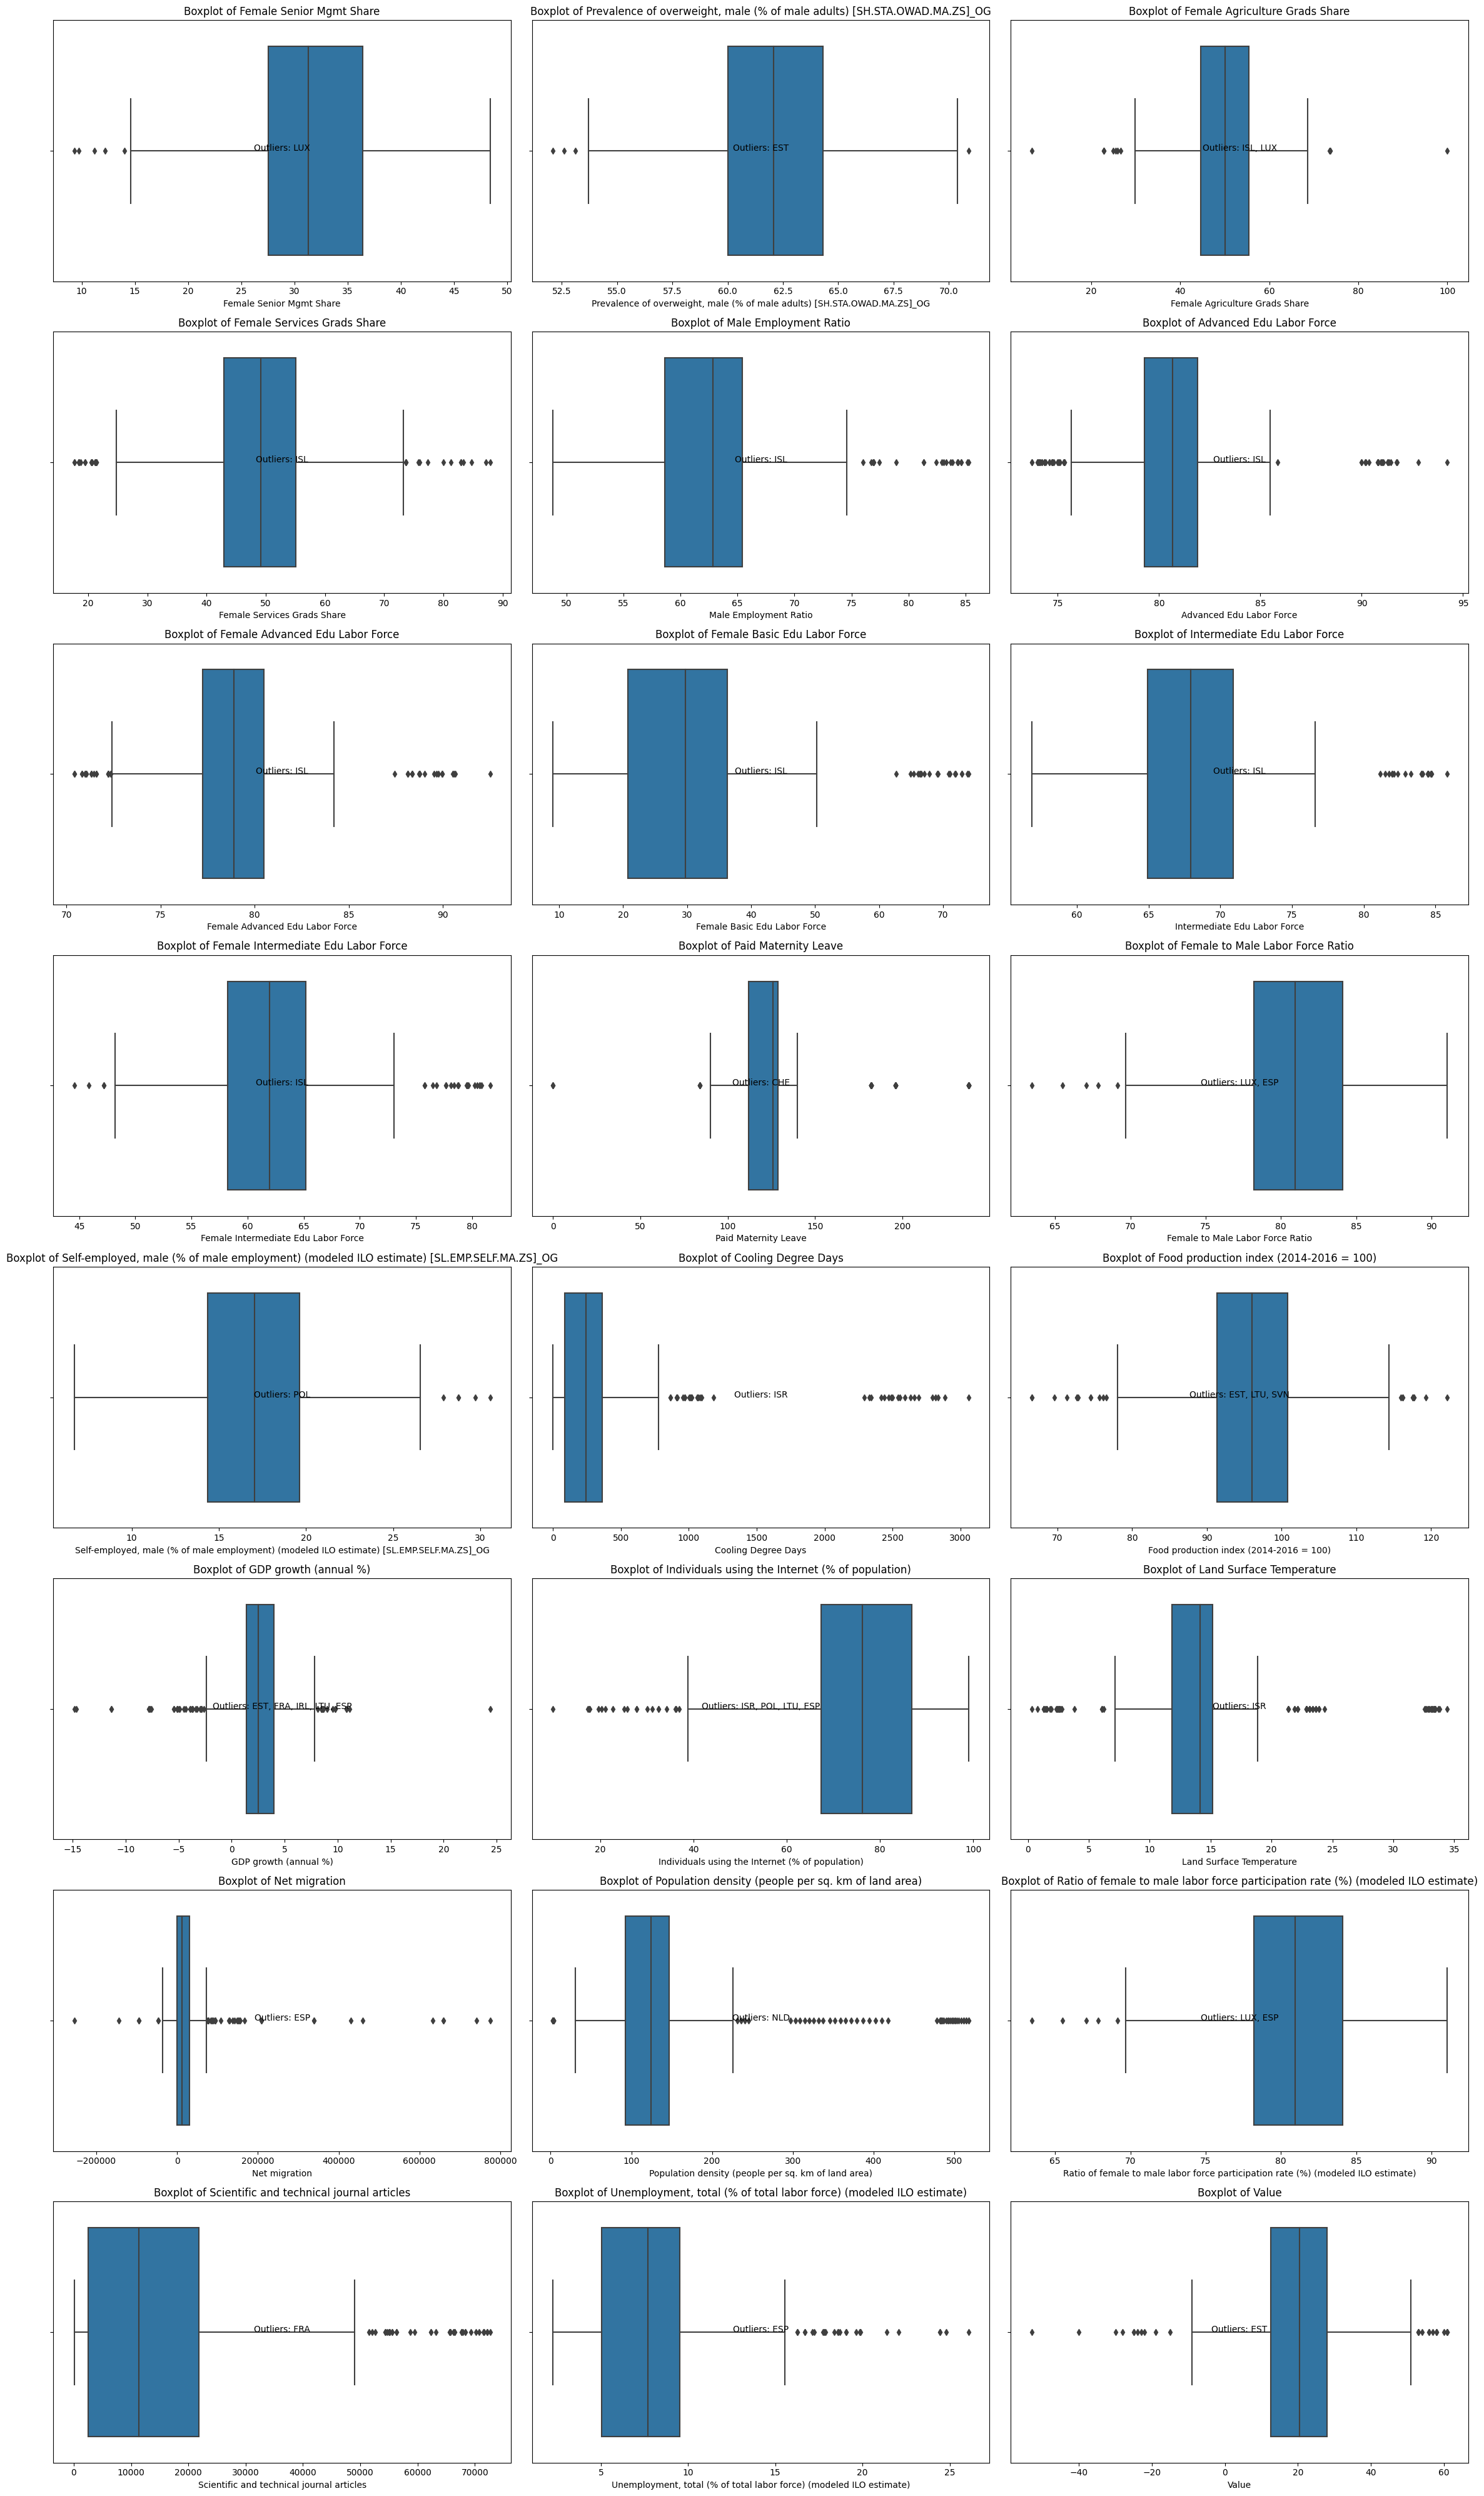

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Determine the layout of the grid
num_plots = len(check_outliers)
num_cols = 3  # You can adjust this to change the number of columns
num_rows = math.ceil(num_plots / num_cols)

# Create a new figure
fig, axs = plt.subplots(num_rows, num_cols, figsize=(23, num_rows * 5))

# For each feature with outliers
for i, (feature, countries) in enumerate(check_outliers.items()):
    # Determine the location on the grid
    row = i // num_cols
    col = i % num_cols
    
    # Create a boxplot of the feature
    sns.boxplot(x=merged_df[feature], ax=axs[row, col])
    
    # Add a title
    axs[row, col].set_title(f'Boxplot of {feature}')
    
    # Annotate the boxplot with the outlier countries
    outlier_countries = ', '.join(countries)
    axs[row, col].annotate(f'Outliers: {outlier_countries}', xy=(0.5, 0.5), xycoords='axes fraction', ha='center')

# Remove any unused subplots
for j in range(i+1, num_rows*num_cols):
    fig.delaxes(axs.flatten()[j])

# Show the plot
plt.tight_layout()
plt.show()


In [101]:
# Exclude the columns you want to exclude
columns_to_exclude = ['Country Code', 'Time']
# Get the columns to explore (all columns except the ones to exclude)
columns_to_explore = [col for col in merged_df.columns if col not in columns_to_exclude]


# 2.	Exploratory data analysis – 

In [102]:
## Malak Boxplot,dist,hist Code

# # Calculate the number of rows and columns for the subplots
# num_rows = len(columns_to_explore)
# figsize = (12, 6 * num_rows)

# # Create subplots for boxplots, histograms, and KDE plots
# fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=figsize)

# # Adjust the spacing between subplots
# plt.subplots_adjust(hspace=0.7, wspace=0.4)

# # Iterate over the columns to explore
# for i, col in enumerate(columns_to_explore):
#     # Plot boxplot
#     ax_boxplot = axes[i, 0]
#     ax_boxplot.boxplot(merged_df[col].dropna())
#     ax_boxplot.set_title('Boxplot')

#     # Plot histogram
#     ax_hist = axes[i, 1]
#     ax_hist.hist(merged_df[col].dropna(), bins=20, edgecolor='black', alpha=0.5)
#     ax_hist.set_title('Histogram')

#     # Plot KDE plot
#     ax_kde = axes[i, 2]
#     sns.kdeplot(merged_df[col].dropna(), ax=ax_kde, fill=True)
#     ax_kde.set_title('KDE Plot')

#     # Add feature name as the shared y-axis label for the subplots
#     ax_boxplot.set_ylabel(col)

# # Increase vertical spacing between subplots
# plt.subplots_adjust(hspace=0.8)

# # Show the plots
# #save plot as png
# plt.savefig('plots.png')
#change merged_df Country Code to label encoded values
merged_df['Country Code'] = merged_df['Country Code'].replace(label_dict)

In [103]:
#scale merged_df and save into new dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
merged_df_scaled = pd.DataFrame(scaler.fit_transform(merged_df), columns=merged_df.columns)


## Feature Importance ( might remove)

#predict per country per time

In [104]:

# Assume 'Value' is your target variable
target = 'Value'

# Remove target variable from features
features = merged_df_scaled.drop(columns=[target])

# Train a RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(features, merged_df_scaled[target])

# Get feature importance
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'feature': features.columns, 'importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

#mean of feature importances
feature_importances['importance'].mean()

#show faetures above mean


                                              feature  importance
4                             Females with HIV+ Share    0.191406
27  Self-employed, male (% of male employment) (mo...    0.133849
45          Scientific and technical journal articles    0.066392
7                              Female Edu Grads Share    0.036352
17                Female Intermediate Edu Labor Force    0.033595
33                                  Agricultural Land    0.028407
43  Proportion of seats held by women in national ...    0.024875
10                            Female Graduation Ratio    0.023558
2                            Female Senior Mgmt Share    0.021363
37                              GDP growth (annual %)    0.019255
34                                Cooling Degree Days    0.018920
8                           Female Health Grads Share    0.018696
26                   Female to Male Labor Force Ratio    0.018377
1                                        Country Code    0.018273
41        

0.021276595744680857

In [105]:
feature_importances = feature_importances[feature_importances['importance'] > feature_importances['importance'].median()]


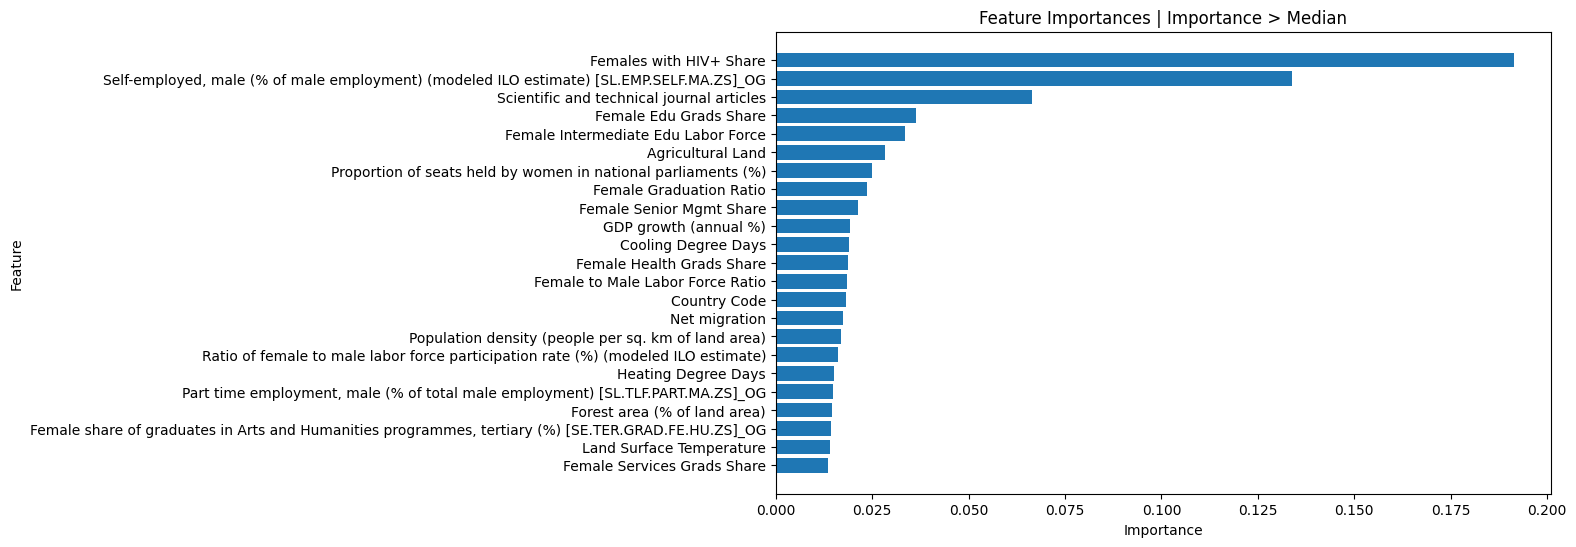

In [106]:

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances | Importance > Median')
plt.gca().invert_yaxis()
plt.show()

    features that has importance above mean importance

## Correlation

<AxesSubplot: >

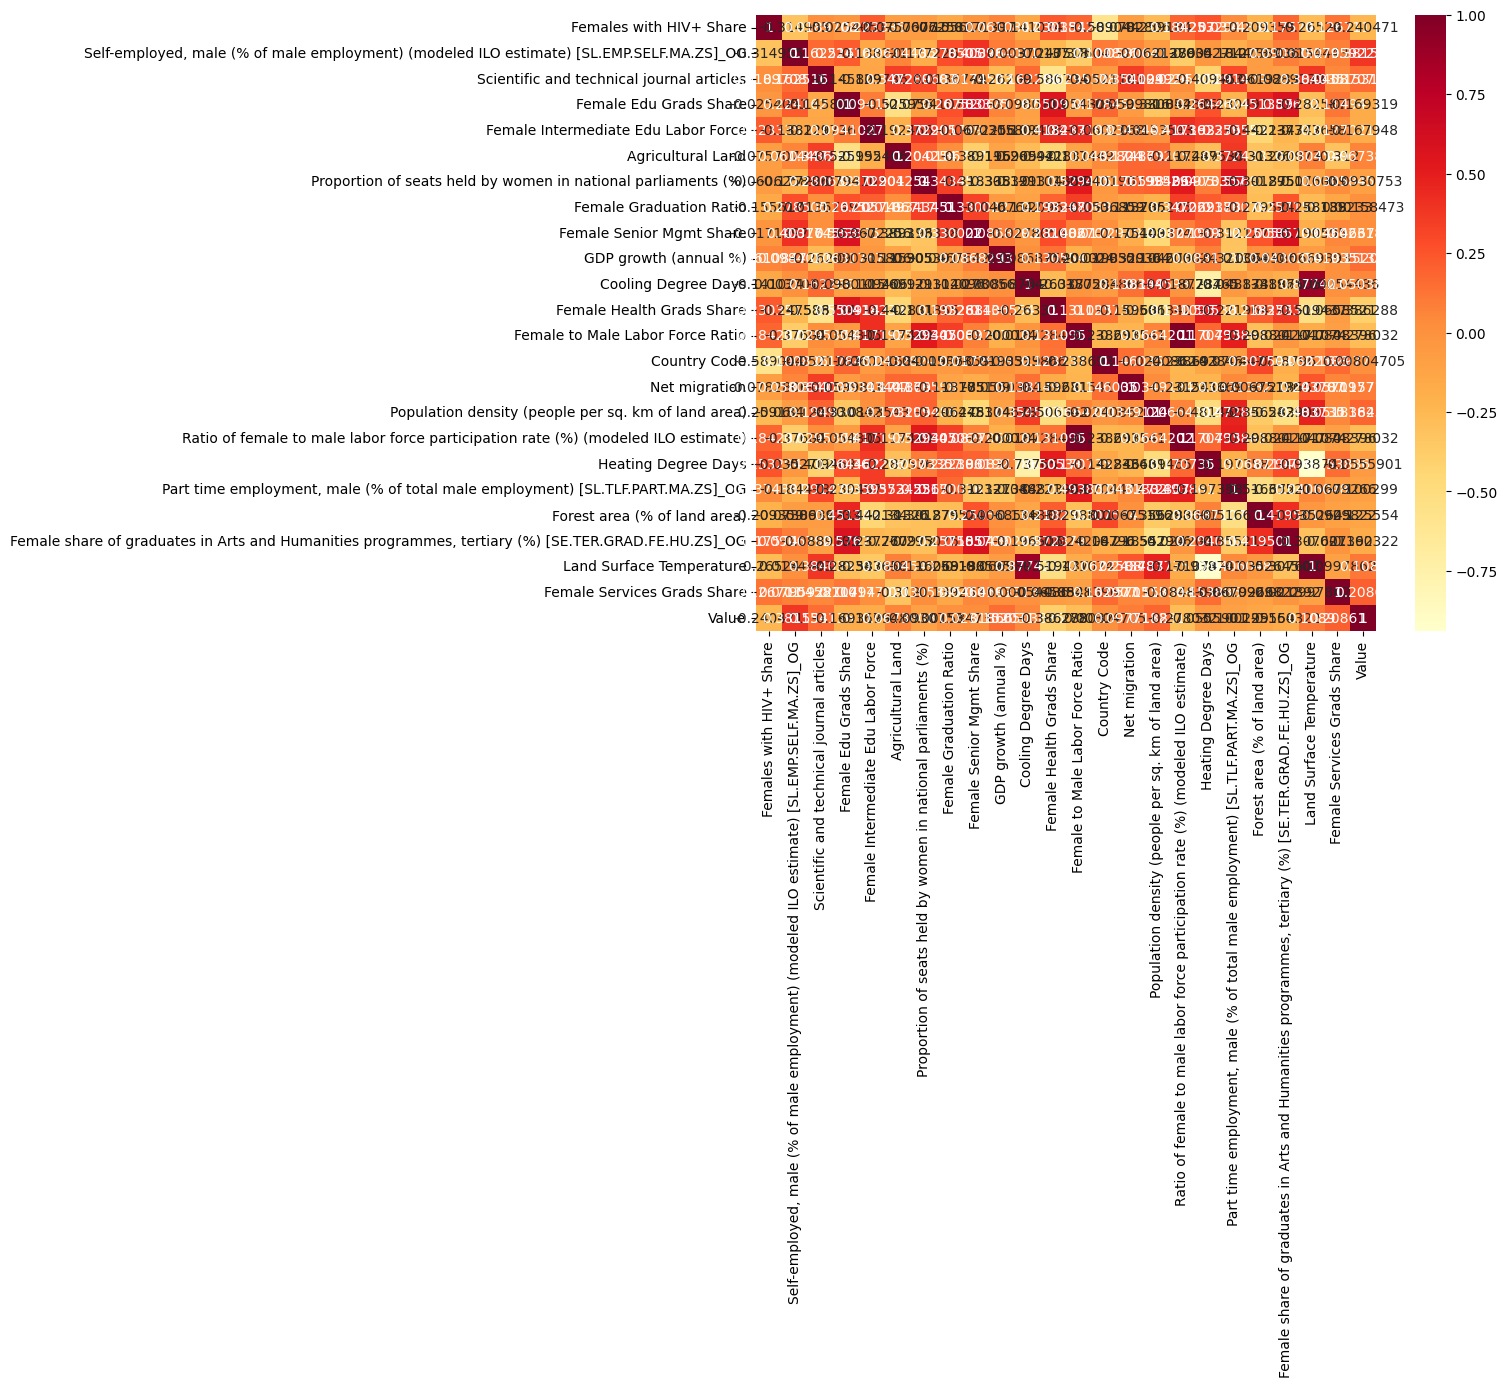

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the top features above the mean importance
top_features = feature_importances
# Select the top feature names
top_feature_names = top_features['feature'].tolist()

# Create a subset of the dataset with only the top features and the target variable
subset_df = merged_df_scaled[top_feature_names + [target]]
#drop correlated feature (0.75) and plot matrix

# Calculate the correlation matrix
corr = subset_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='YlOrRd', annot=True, fmt='g', cbar=True)

# Rotate and align the x labels





<AxesSubplot: >

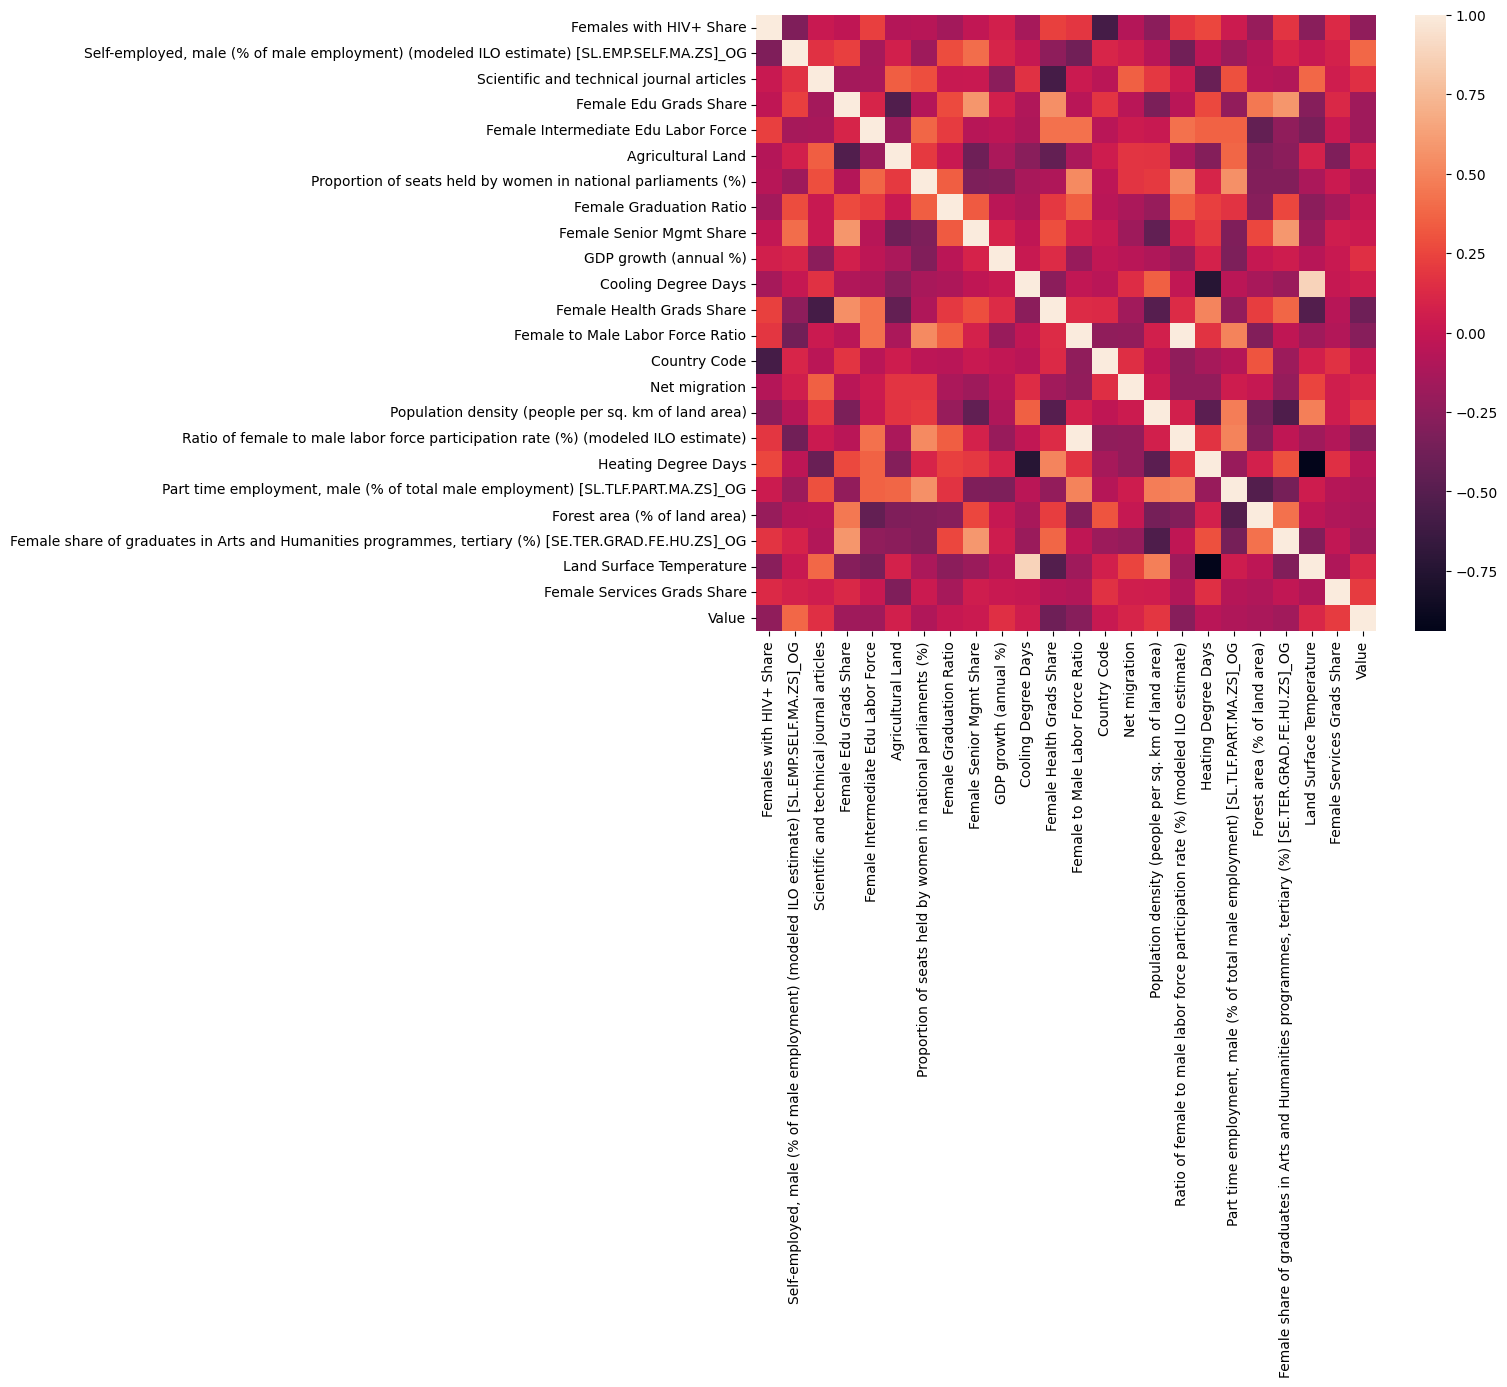

In [108]:
# Calculate the correlation matrix
corr = subset_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, fmt='g', cbar=True)

# Rotate and align the x labels

In [109]:

import seaborn as sns
import matplotlib.pyplot as plt

# Extract the top features above the mean importance
top_features = feature_importances
# Select the top feature names
top_feature_names = top_features['feature'].tolist()

# Create a subset of the dataset with only the top features and the target variable
subset_df = merged_df_scaled[top_feature_names + [target]]

# Calculate the correlation matrix
corr = subset_df.corr()

# Drop highly correlated features
correlated_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.75:
            colname = corr.columns[i]
            correlated_features.add(colname)

subset_df = subset_df.drop(correlated_features, axis=1)








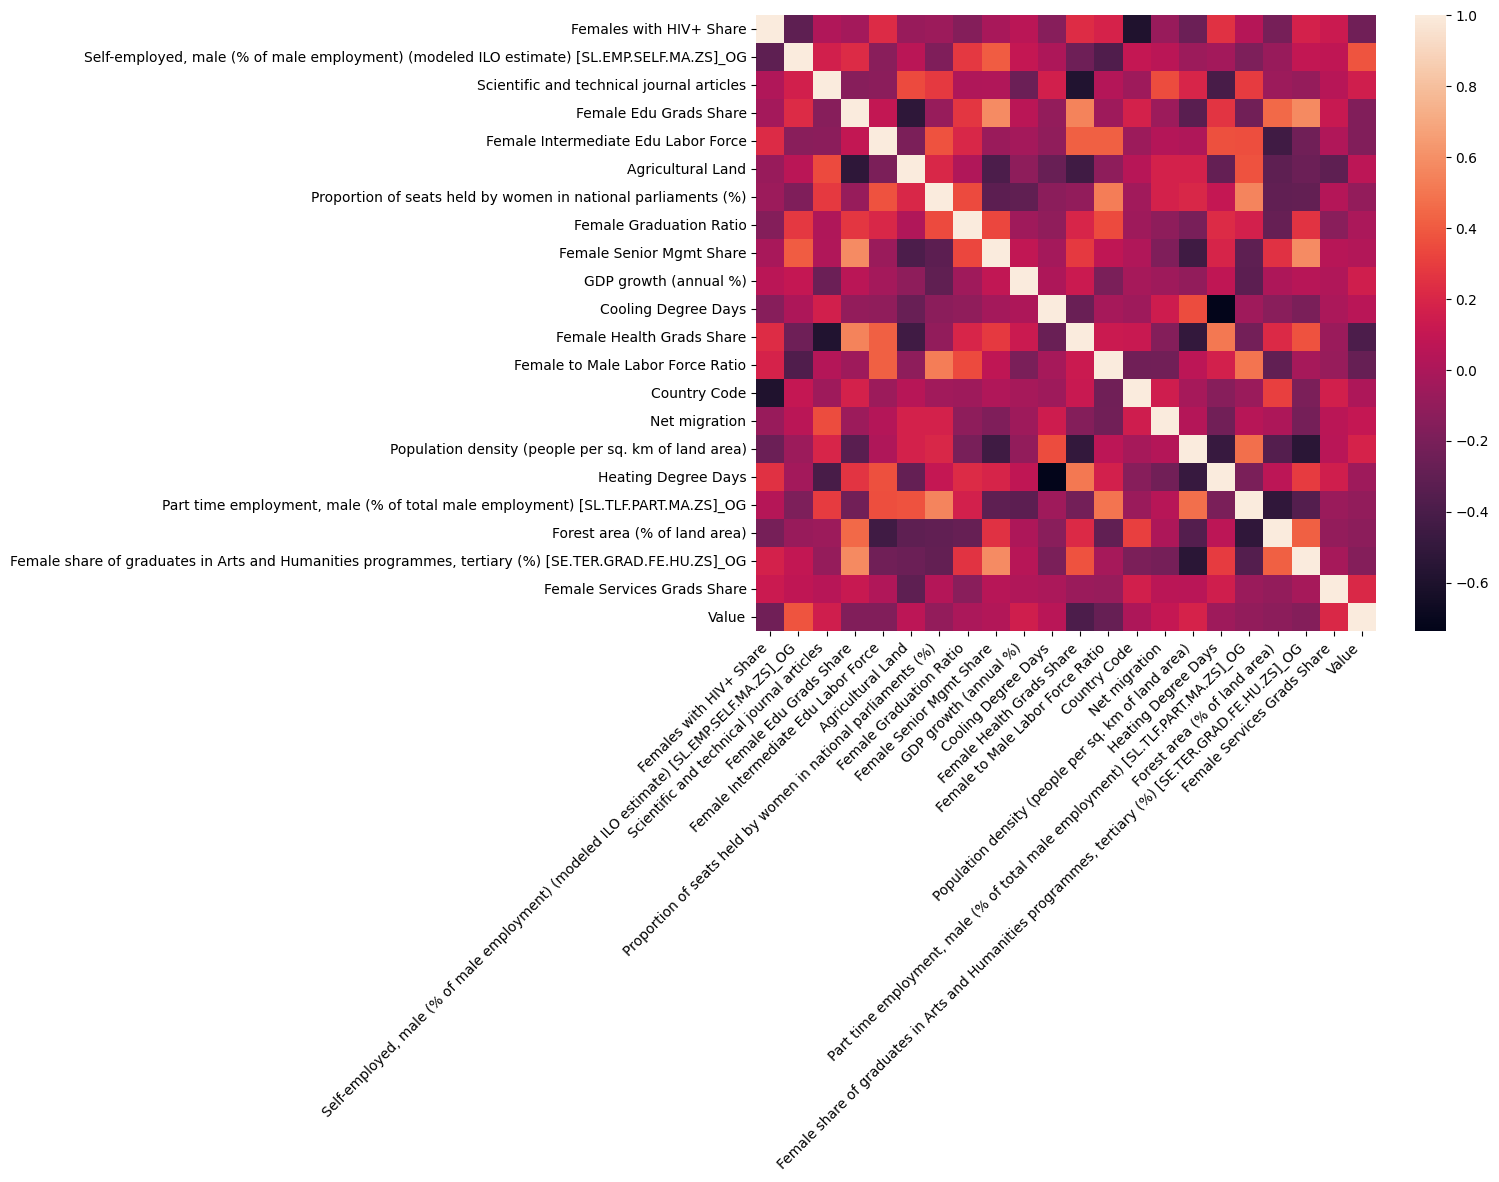

In [110]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset_df.corr(), fmt='g', cbar=True)

# Rotate and align the x labels
plt.xticks(rotation=45, ha='right')

plt.show()

In [111]:
#mean of feature importances
feature_importances['importance'].mean()

#show faetures above mean
feature_importances[feature_importances['importance'] > feature_importances['importance'].mean()]


feature  importance
4                             Females with HIV+ Share    0.191406
27  Self-employed, male (% of male employment) (mo...    0.133849
45          Scientific and technical journal articles    0.066392
7                              Female Edu Grads Share    0.036352

# Machine Learning

In [112]:
#remove brackets and their contents from column names, rename column names
merged_df = merged_df.rename(columns=lambda x: x.split('[')[0])


In [113]:
#scale merged_df and save into new dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
merged_df_scaled = pd.DataFrame(scaler.fit_transform(merged_df), columns=merged_df.columns)


In [114]:
from sklearn.model_selection import train_test_split

X = merged_df_scaled.drop('Value', axis=1)
y = merged_df_scaled['Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [115]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [116]:
from sklearn.metrics import mean_absolute_error

# Decision Tree
dt_predictions = dt.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_predictions)

# Random Forest
rf_predictions = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)

# XGBoost
xgb_predictions = xgb.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)

print('Decision Tree MAE:', dt_mae)
print('Random Forest MAE:', rf_mae)
print('XGBoost MAE:', xgb_mae)


Decision Tree MAE: 0.8180117446540587
Random Forest MAE: 0.661407084640739
XGBoost MAE: 0.7554167713654152


In [117]:
# Calculate MAE of a baseline model that always predicts the median
baseline_pred = [y_train.median()] * len(y_test)
baseline_mae = mean_absolute_error(y_test, baseline_pred)
mae_percent = (rf_mae / (y_train.max() - y_train.min())) * 100

In [118]:
mae_percent

8.799236297001459

# Cross Validation

In [119]:
from sklearn.model_selection import cross_val_score

# Initialize dictionaries to store the results
dt_cv_results = {}
rf_cv_results = {}
xgb_cv_results = {}

# Iterate over the range of CV values
for cv in range(3, 11):
    # Compute cross-validated MAE for Decision Tree
    dt_cv_scores = cross_val_score(dt, X, y, cv=cv, scoring='neg_mean_absolute_error')
    dt_cv_mae = -1 * dt_cv_scores.mean()
    dt_cv_results[cv] = dt_cv_mae

    # Compute cross-validated MAE for Random Forest
    rf_cv_scores = cross_val_score(rf, X, y, cv=cv, scoring='neg_mean_absolute_error')
    rf_cv_mae = -1 * rf_cv_scores.mean()
    rf_cv_results[cv] = rf_cv_mae

    # Compute cross-validated MAE for XGBoost
    xgb_cv_scores = cross_val_score(xgb, X, y, cv=cv, scoring='neg_mean_absolute_error')
    xgb_cv_mae = -1 * xgb_cv_scores.mean()
    xgb_cv_results[cv] = xgb_cv_mae

# Find the number of folds that gave the lowest MAE for each model
best_dt_cv = min(dt_cv_results, key=dt_cv_results.get)
best_rf_cv = min(rf_cv_results, key=rf_cv_results.get)
best_xgb_cv = min(xgb_cv_results, key=xgb_cv_results.get)

print('Best CV for Decision Tree:', best_dt_cv)
print('Best CV for Random Forest:', best_rf_cv)
print('Best CV for XGBoost:', best_xgb_cv)


Best CV for Decision Tree: 9
Best CV for Random Forest: 9
Best CV for XGBoost: 7


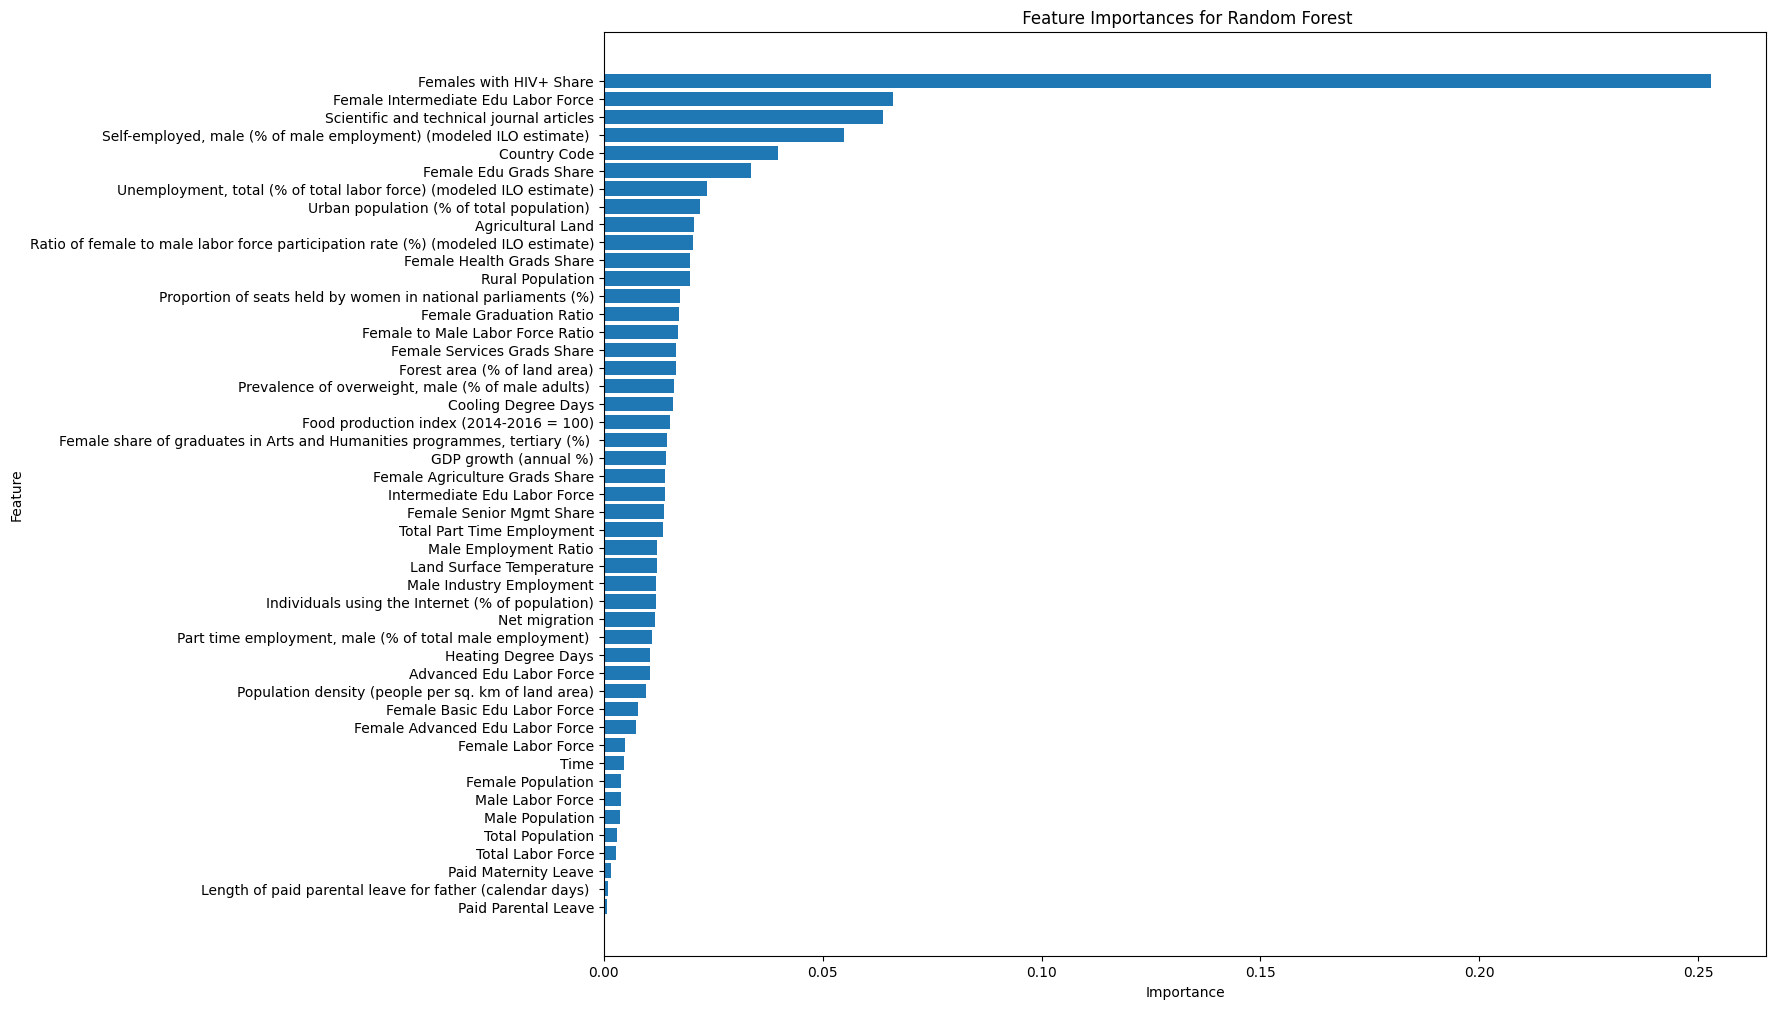

In [120]:
# #show feature importance of each model
# # Decision Tree
# dt_importances = pd.DataFrame({'feature': X_train.columns, 'importance': dt.feature_importances_})
# dt_importances = dt_importances.sort_values('importance', ascending=False)
# #display in plot
# plt.figure(figsize=(10, 6))
# plt.barh(dt_importances['feature'][:25], dt_importances['importance'][:25])
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Top 25 Feature Importances for Decision Tree')
# plt.gca().invert_yaxis()
# plt.show()


# Random Forest
rf_importances = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
rf_importances = rf_importances.sort_values('importance', ascending=False)
#display in plot
plt.figure(figsize=(15, 12))
plt.barh(rf_importances['feature'], rf_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(' Feature Importances for Random Forest')
plt.gca().invert_yaxis()
plt.show()


# # XGBoost
# xgb_importances = pd.DataFrame({'feature': X_train.columns, 'importance': xgb.feature_importances_})
# xgb_importances = xgb_importances.sort_values('importance', ascending=False)
# #display in plot
# plt.figure(figsize=(10, 6))
# plt.barh(xgb_importances['feature'][:25], xgb_importances['importance'][:25])
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Top 25 Feature Importances for XGBoost')
# plt.gca().invert_yaxis()
# plt.show()


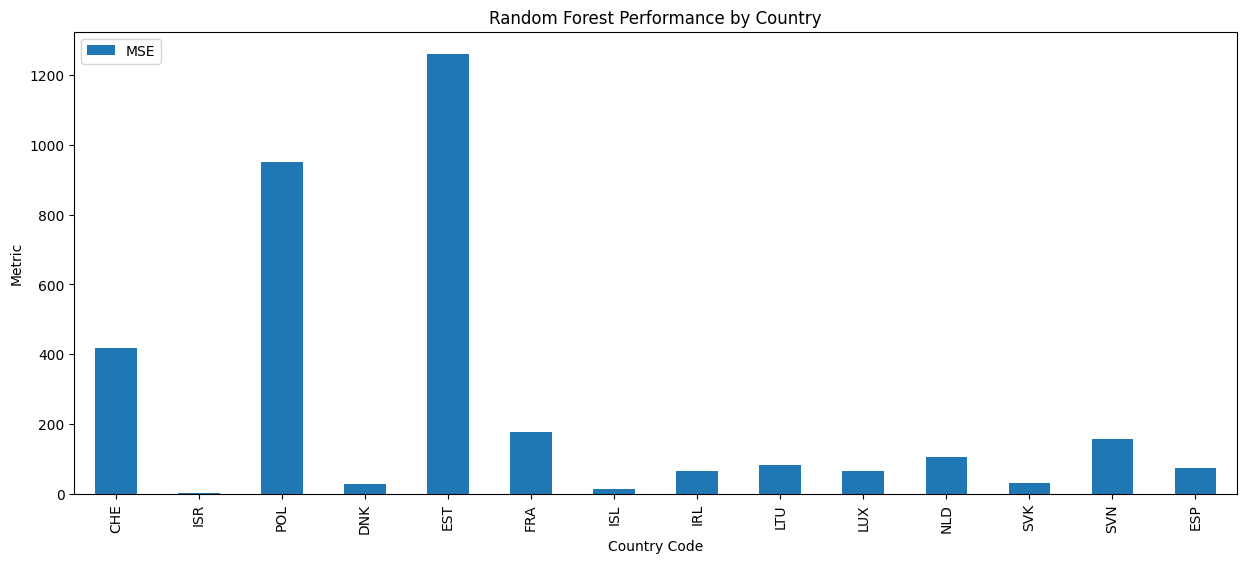

In [121]:
#show accuracy for each country using random forest
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

# Create a dictionary to store the results
results = {}

# Iterate through each country
for country in merged_df['Country Code'].unique():
    # Create a subset of the data for the current country
    country_df = merged_df[merged_df['Country Code'] == country]
    
    # Split the data into features and target
    X = country_df.drop(columns=['Value'])
    y = country_df['Value']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a Random Forest model
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = rf.predict(X_test)
    
    # Calculate the metrics
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    evs = explained_variance_score(y_test, predictions)
    
    # Store the results for the current country in the dictionary
    results[country] = [r2, mse, mae, evs]

#only keep MSE in results
results = {k: v[1] for k, v in results.items()}

#convert Country code to encoded values
results = {label_dict_swap[k]: v for k, v in results.items()}
# Convert the dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['MSE'])

# Display the DataFrame in plot
results_df.plot(kind='bar', figsize=(15, 6))
plt.title('Random Forest Performance by Country')
plt.xlabel('Country Code')
plt.ylabel('Metric')
plt.legend(loc='upper left')
plt.show()


In [122]:
results

{'CHE': 417.4122149141229,
 'ISR': 2.469004655626798,
 'POL': 951.7481310187487,
 'DNK': 26.145391791680204,
 'EST': 1261.8915074503682,
 'FRA': 177.90724959205488,
 'ISL': 13.533498087289923,
 'IRL': 65.87084199319067,
 'LTU': 82.78552390053146,
 'LUX': 64.3114834938137,
 'NLD': 104.96764687783691,
 'SVK': 30.26786515979793,
 'SVN': 156.18025615797734,
 'ESP': 74.38907826230994}

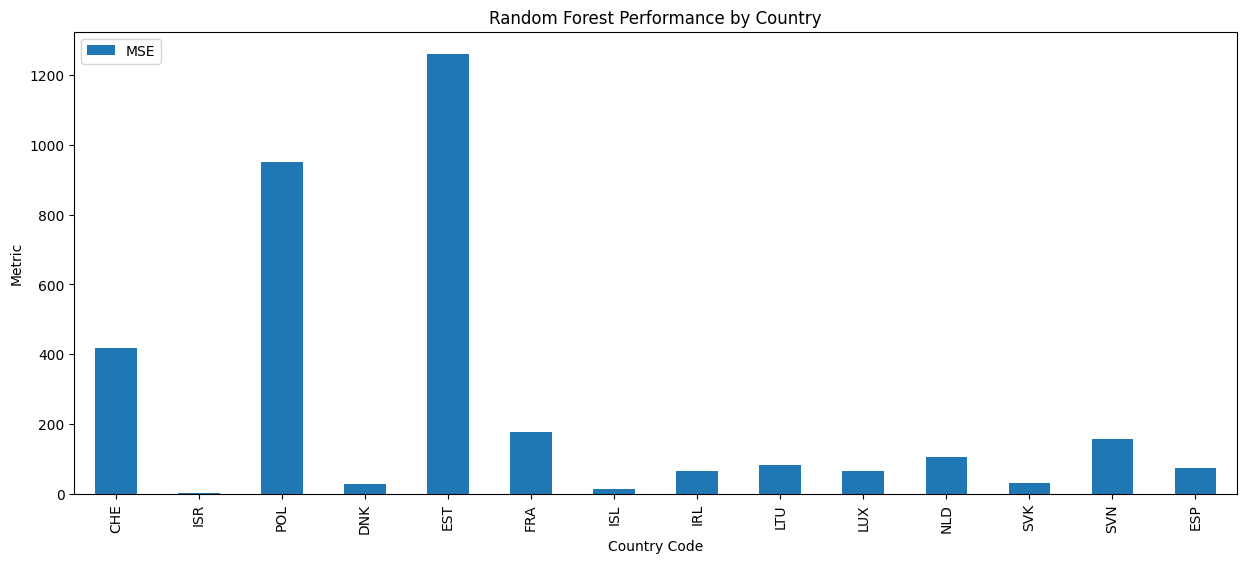

In [123]:

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['MSE'])

# Display the DataFrame in plot
results_df.plot(kind='bar', figsize=(15, 6))
plt.title('Random Forest Performance by Country')
plt.xlabel('Country Code')
plt.ylabel('Metric')
plt.legend(loc='upper left')
plt.show()

Self-employed, total

In [124]:
#replace merge_df Country Code with label encoded values
merged_df['Country Code'] = merged_df['Country Code'].replace(label_dict_swap)


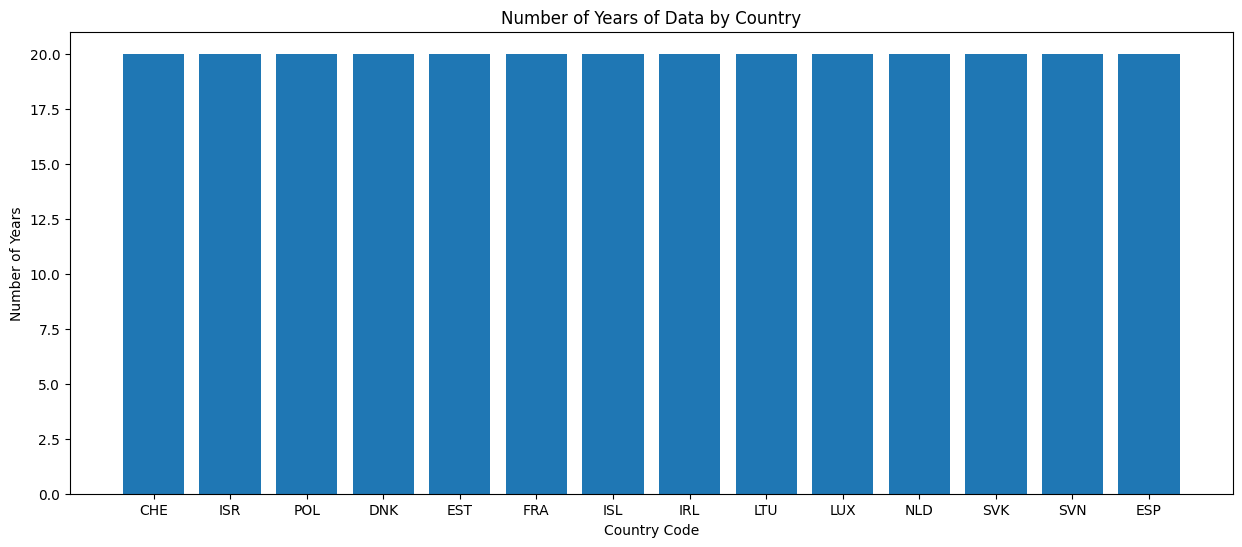

In [125]:
#save each country with dict, key is country code, value is dataframe of country
country_dict = {}
for country in merged_df['Country Code'].unique():
    country_dict[country] = 20

#draw barplot of country_dict
plt.figure(figsize=(15, 6))
plt.bar(country_dict.keys(), country_dict.values())
plt.xlabel('Country Code')
plt.ylabel('Number of Years')
plt.title('Number of Years of Data by Country')
plt.show()